# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
#genes = torch.load('../data/temp/vbd8bavn/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
genes = torch.load('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu'))['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/gNNpgpo6gATjuxTE7CCp.h5ad')
adata = sc.read_h5ad('../data/gNNpgpo6gATjuxTE7CCp.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata = adata[:, adata.var.index.isin(genes)]
adata

View of AnnData object with n_obs × n_vars = 51370 × 23149
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_ids', 'biotype

In [4]:
CELLTYPES = [
"retinal rod cell",
"Mueller cell",
"amacrine cell",
"ON-bipolar cell",
"rod bipolar cell",
"retinal cone cell",
"retina horizontal cell",
"retinal ganglion cell",
"astrocyte",
"microglial cell",
]

retinal rod cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 12.13 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


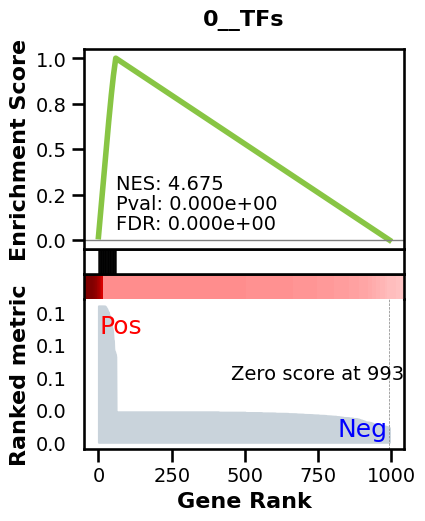

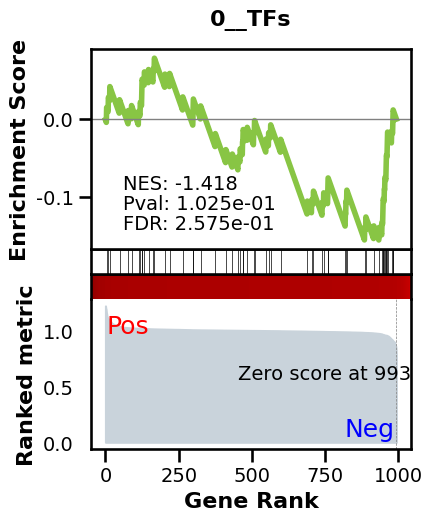

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 630 genes
intersection pct: 0.6338028169014085
precision:  0.0052188435042794514 
recall:  0.4934210526315789 
random precision: 0.0007671537083301789


  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 1976.09it/s]

Average Precision (AP):  0.006033236518695923
Area Under Precision-Recall Curve (AUPRC):  0.005094076938650243
EPR: 31.399097597750796


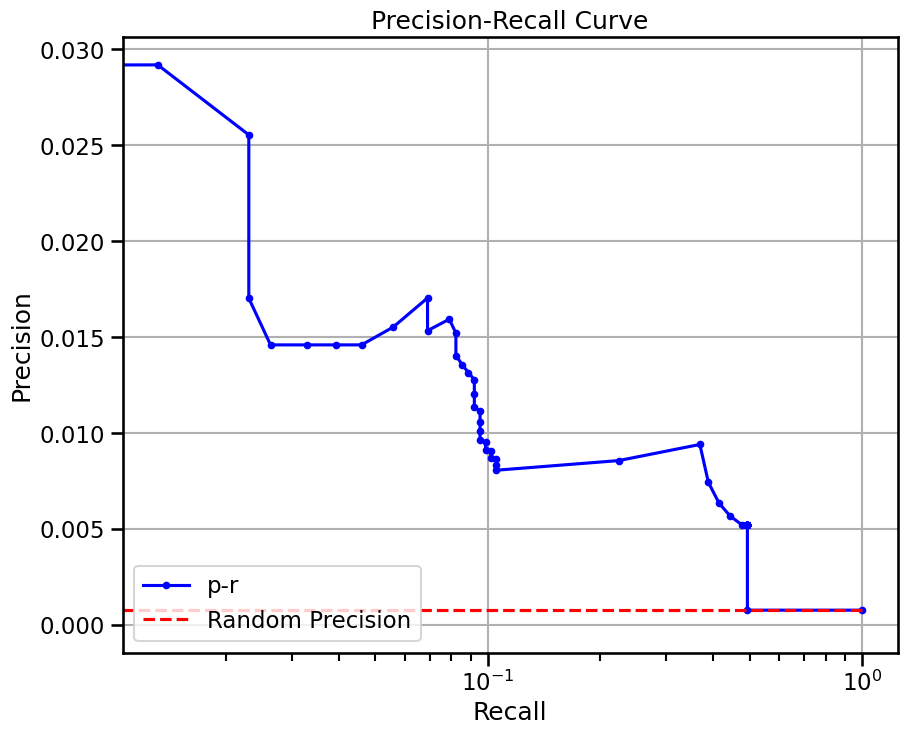

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 33.35 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


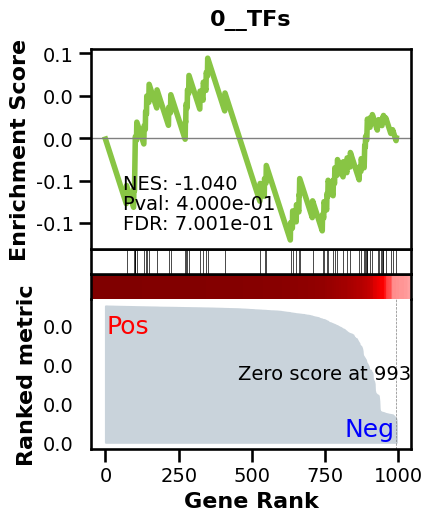

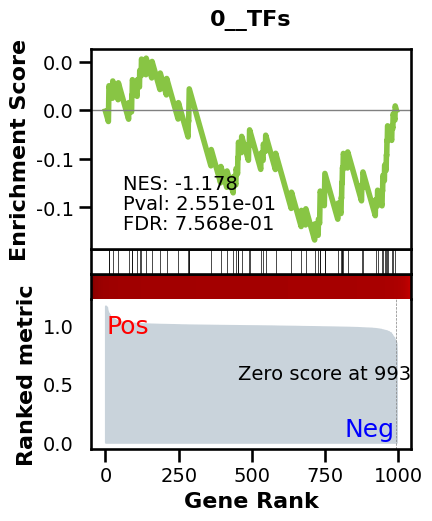

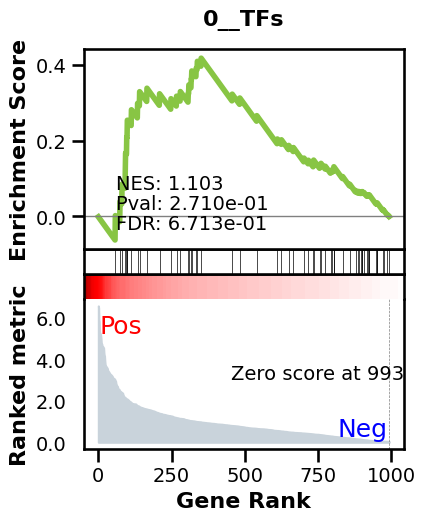

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 630 genes
intersection pct: 0.6338028169014085
precision:  0.0007591266310333455 
recall:  0.8026315789473685 
random precision: 0.0007671537083301789


  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 2048.59it/s]

Average Precision (AP):  0.0014307978544513419
Area Under Precision-Recall Curve (AUPRC):  0.0012748639565621418
EPR: 8.676461558703565


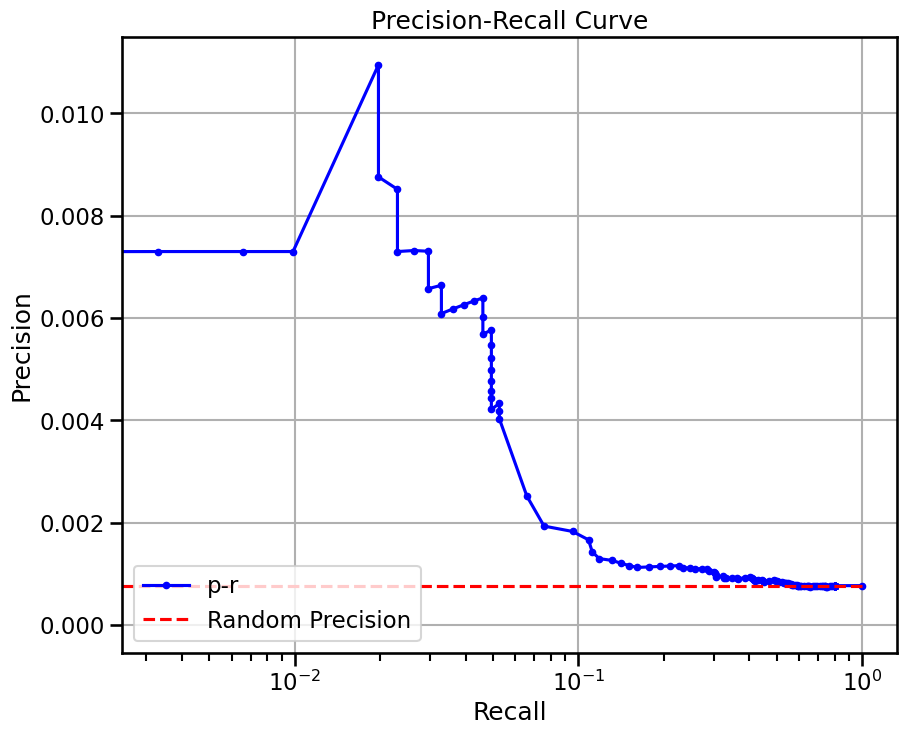

Mueller cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100




running jobs on 20 threads


Elapsed time: 141.25 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


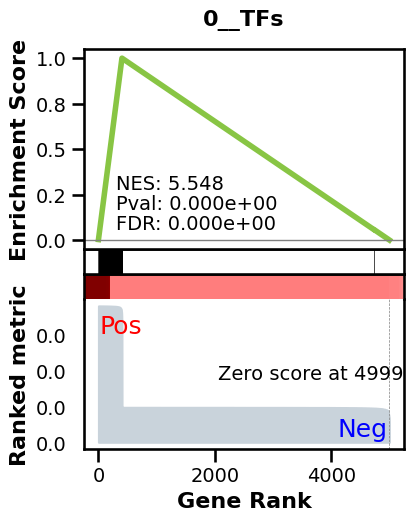

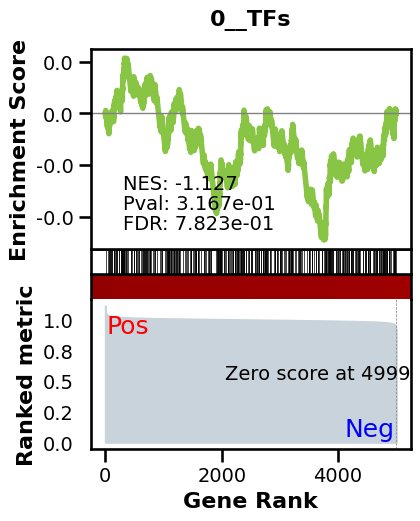

_________________________________________
TF specific enrichment


found some significant results for  1.7241379310344827 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3634 genes
intersection pct: 0.7268
precision:  0.006042782839935865 
recall:  0.4251127985033564 
random precision: 0.001376576029580251


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 41.01it/s]

  8%|▊         | 10/128 [00:00<00:02, 41.14it/s]

 12%|█▏        | 15/128 [00:00<00:02, 41.15it/s]

 16%|█▌        | 20/128 [00:00<00:02, 41.24it/s]

 20%|█▉        | 25/128 [00:00<00:02, 41.36it/s]

 23%|██▎       | 30/128 [00:00<00:02, 41.34it/s]

 27%|██▋       | 35/128 [00:00<00:02, 41.29it/s]

 31%|███▏      | 40/128 [00:00<00:02, 41.31it/s]

 35%|███▌      | 45/128 [00:01<00:02, 41.34it/s]

 39%|███▉      | 50/128 [00:01<00:01, 41.38it/s]

 43%|████▎     | 55/128 [00:01<00:01, 41.38it/s]

 47%|████▋     | 60/128 [00:01<00:01, 41.45it/s]

 51%|█████     | 65/128 [00:01<00:01, 41.53it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 41.54it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 41.42it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 41.48it/s]

 66%|██████▋   | 85/128 [00:02<00:01, 41.50it/s]

 70%|███████   | 90/128 [00:02<00:00, 41.56it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 41.61it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 41.65it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 41.64it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 41.68it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 41.68it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 41.71it/s]

 98%|█████████▊| 125/128 [00:03<00:00, 41.73it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 41.49it/s]

Average Precision (AP):  0.0045669569248840865
Area Under Precision-Recall Curve (AUPRC):  0.003956710009010713
EPR: 10.28758850376605


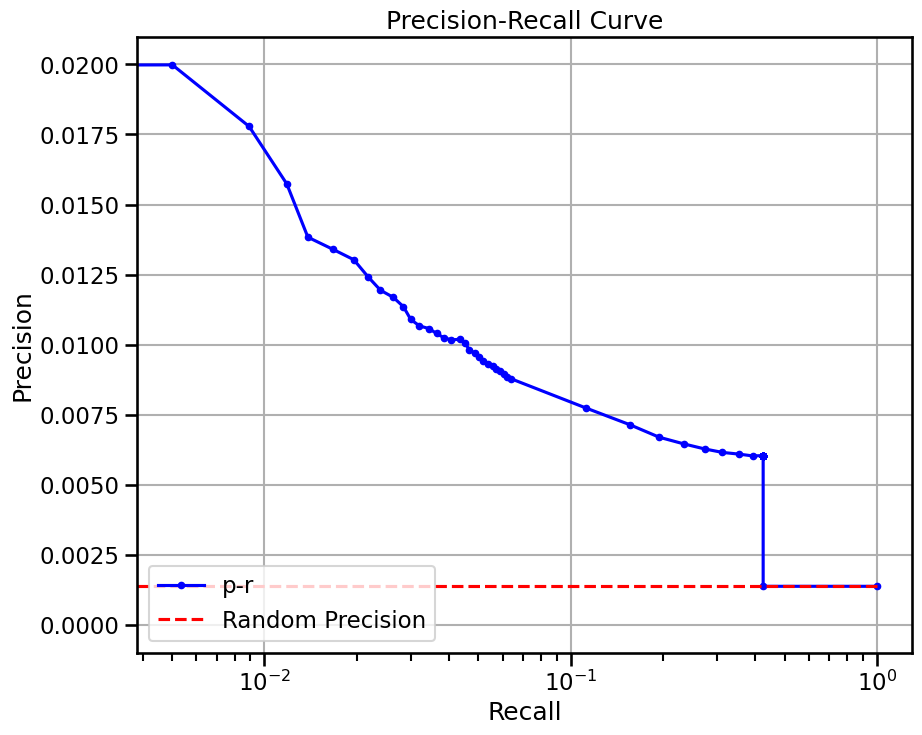

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 543.31 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


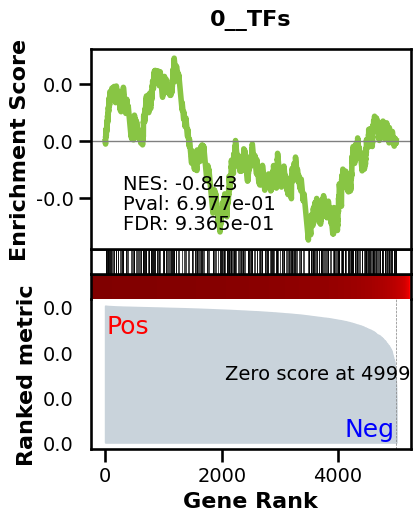

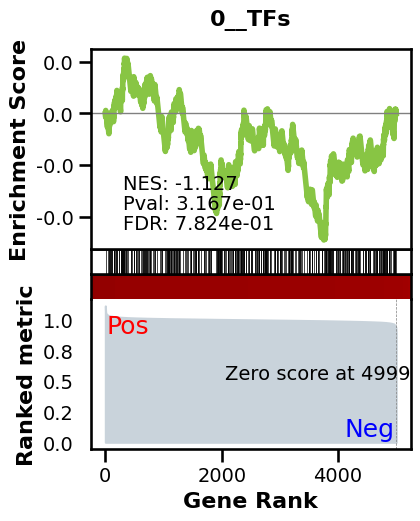

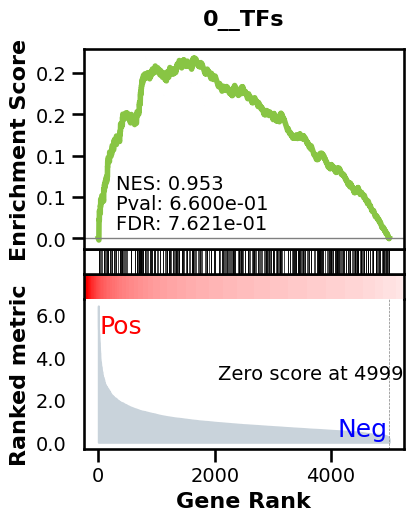

_________________________________________
TF specific enrichment


found some significant results for  10.344827586206897 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3634 genes
intersection pct: 0.7268
precision:  0.001415699118104086 
recall:  0.8421371189611533 
random precision: 0.001376576029580251


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:03, 40.47it/s]

  8%|▊         | 10/128 [00:00<00:02, 40.48it/s]

 12%|█▏        | 15/128 [00:00<00:02, 40.44it/s]

 16%|█▌        | 20/128 [00:00<00:02, 40.43it/s]

 20%|█▉        | 25/128 [00:00<00:02, 40.39it/s]

 23%|██▎       | 30/128 [00:00<00:02, 40.40it/s]

 27%|██▋       | 35/128 [00:00<00:02, 40.38it/s]

 31%|███▏      | 40/128 [00:00<00:02, 40.37it/s]

 35%|███▌      | 45/128 [00:01<00:02, 40.40it/s]

 39%|███▉      | 50/128 [00:01<00:01, 40.42it/s]

 43%|████▎     | 55/128 [00:01<00:01, 40.45it/s]

 47%|████▋     | 60/128 [00:01<00:01, 40.44it/s]

 51%|█████     | 65/128 [00:01<00:01, 40.44it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 40.43it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 40.44it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 40.42it/s]

 66%|██████▋   | 85/128 [00:02<00:01, 40.42it/s]

 70%|███████   | 90/128 [00:02<00:00, 40.24it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 40.30it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 40.32it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 40.37it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 40.39it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 40.38it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 40.38it/s]

 98%|█████████▊| 125/128 [00:03<00:00, 40.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 40.38it/s]

Average Precision (AP):  0.0015481666318454758
Area Under Precision-Recall Curve (AUPRC):  0.0015407384300437075
EPR: 2.52877832023048


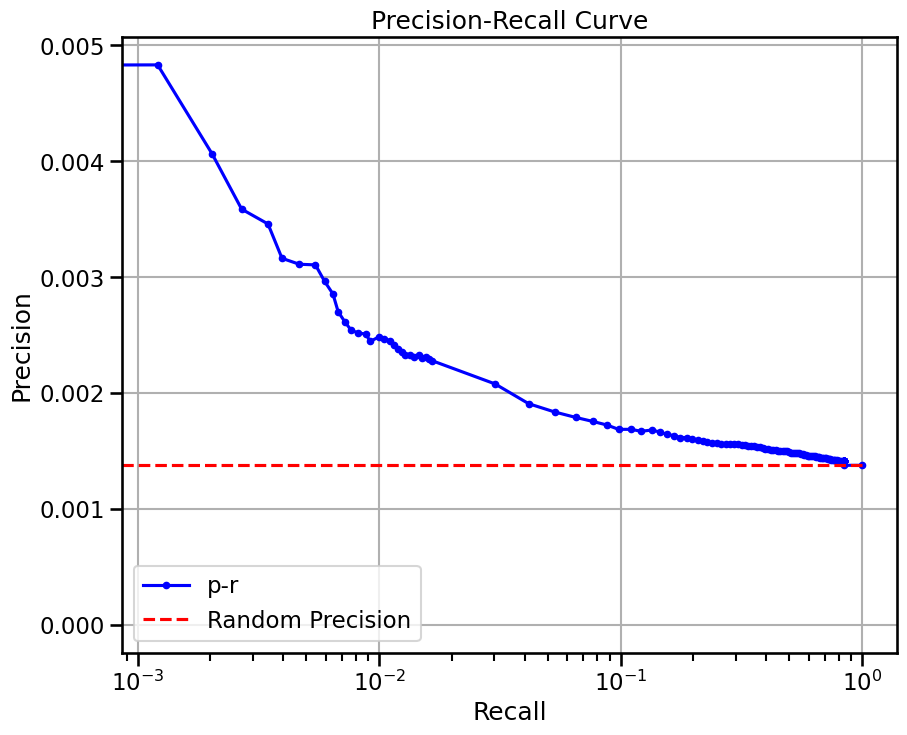

amacrine cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 128.49 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


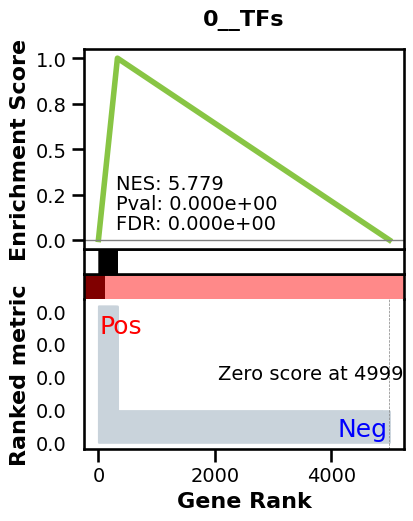

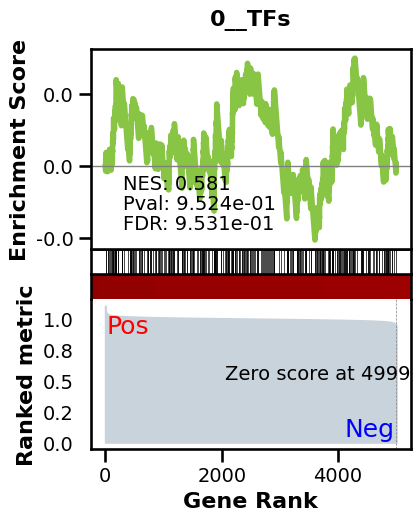

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3599 genes
intersection pct: 0.7198
precision:  0.002894036471168063 
recall:  0.2764334808398456 
random precision: 0.0008202049825155249


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 42.78it/s]

  8%|▊         | 10/128 [00:00<00:02, 42.87it/s]

 12%|█▏        | 15/128 [00:00<00:02, 42.80it/s]

 16%|█▌        | 20/128 [00:00<00:02, 42.63it/s]

 20%|█▉        | 25/128 [00:00<00:02, 42.61it/s]

 23%|██▎       | 30/128 [00:00<00:02, 42.69it/s]

 27%|██▋       | 35/128 [00:00<00:02, 42.74it/s]

 31%|███▏      | 40/128 [00:00<00:02, 42.78it/s]

 35%|███▌      | 45/128 [00:01<00:01, 42.79it/s]

 39%|███▉      | 50/128 [00:01<00:01, 42.89it/s]

 43%|████▎     | 55/128 [00:01<00:01, 42.90it/s]

 47%|████▋     | 60/128 [00:01<00:01, 42.80it/s]

 51%|█████     | 65/128 [00:01<00:01, 42.84it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 42.84it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 42.76it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 42.78it/s]

 66%|██████▋   | 85/128 [00:01<00:01, 42.81it/s]

 70%|███████   | 90/128 [00:02<00:00, 42.87it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 42.90it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 42.77it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 42.81it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 42.85it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 42.88it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 42.89it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 42.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 42.81it/s]

Average Precision (AP):  0.0018005808669116414
Area Under Precision-Recall Curve (AUPRC):  0.0015707015740793347
EPR: 7.423882345924593


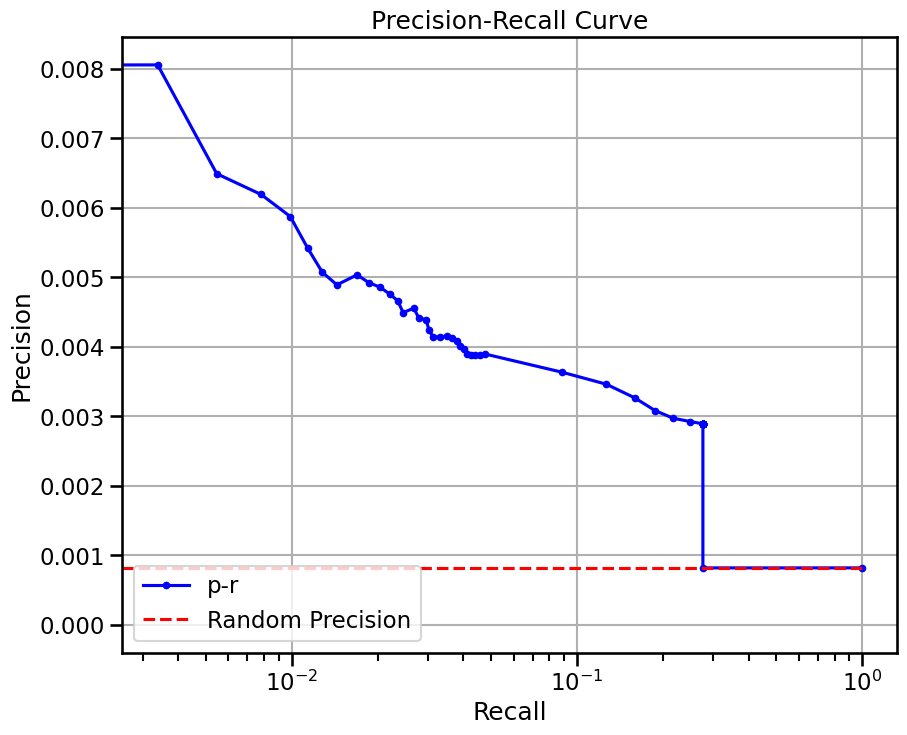

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 510.59 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


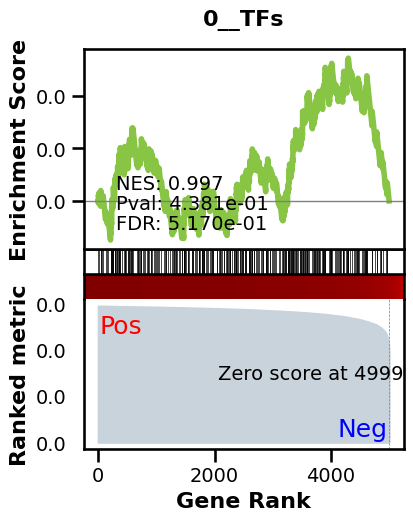

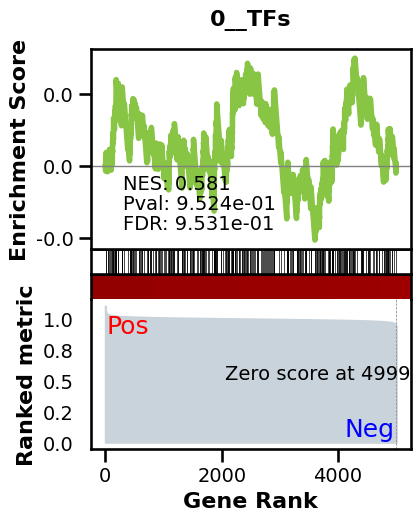

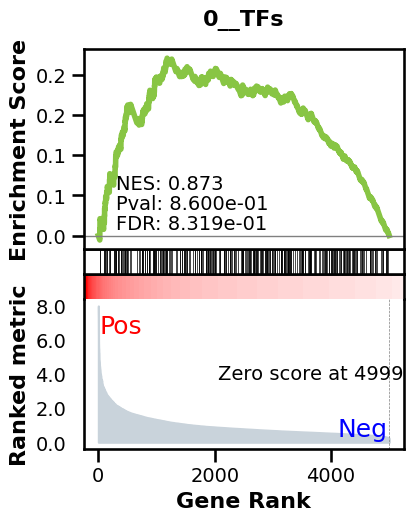

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3599 genes
intersection pct: 0.7198
precision:  0.000843047638991091 
recall:  0.8930420864325394 
random precision: 0.0008202049825155249


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 44.74it/s]

  8%|▊         | 10/128 [00:00<00:02, 44.55it/s]

 12%|█▏        | 15/128 [00:00<00:02, 44.51it/s]

 16%|█▌        | 20/128 [00:00<00:02, 44.54it/s]

 20%|█▉        | 25/128 [00:00<00:02, 44.56it/s]

 23%|██▎       | 30/128 [00:00<00:02, 44.55it/s]

 27%|██▋       | 35/128 [00:00<00:02, 44.62it/s]

 31%|███▏      | 40/128 [00:00<00:01, 44.54it/s]

 35%|███▌      | 45/128 [00:01<00:01, 44.54it/s]

 39%|███▉      | 50/128 [00:01<00:01, 44.57it/s]

 43%|████▎     | 55/128 [00:01<00:01, 44.49it/s]

 47%|████▋     | 60/128 [00:01<00:01, 44.53it/s]

 51%|█████     | 65/128 [00:01<00:01, 44.55it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 44.53it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 44.56it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 44.59it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 44.54it/s]

 70%|███████   | 90/128 [00:02<00:00, 44.54it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 44.57it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 44.53it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 44.57it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 44.64it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 44.62it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 44.61it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 44.59it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 44.55it/s]

Average Precision (AP):  0.0009033718597207721
Area Under Precision-Recall Curve (AUPRC):  0.0009010926542450722
EPR: 2.87863730317829


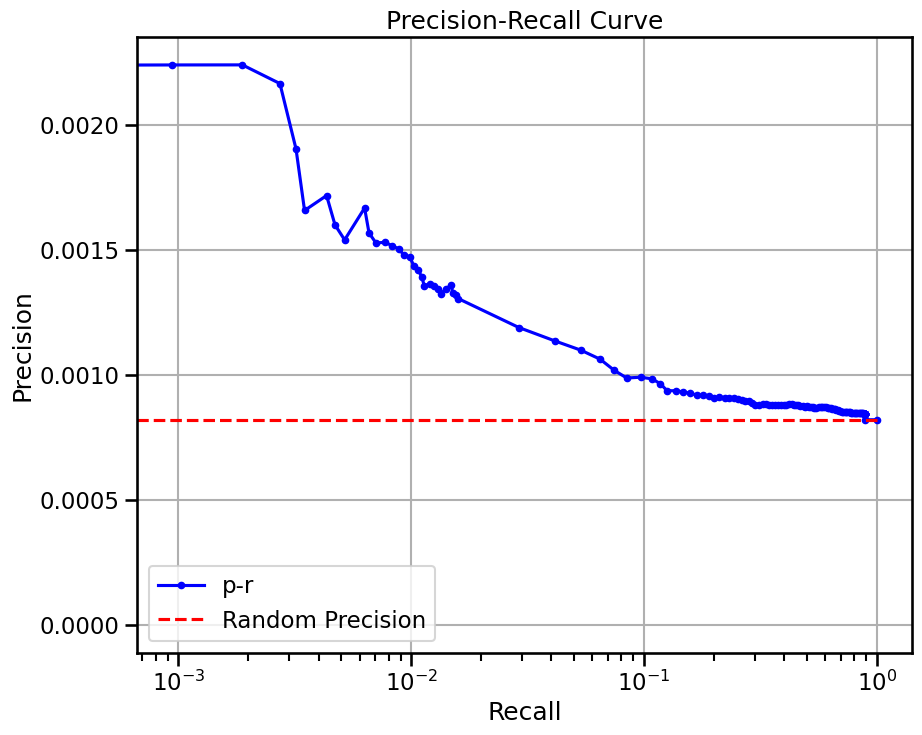

ON-bipolar cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 92.31 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


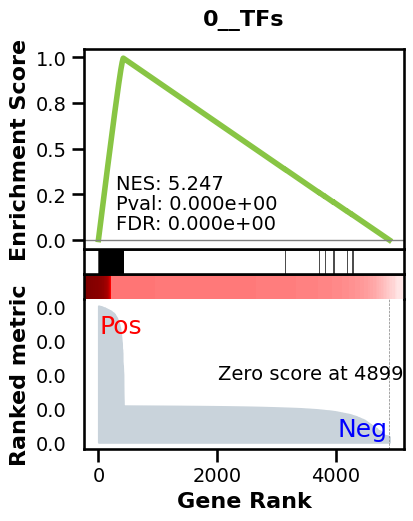

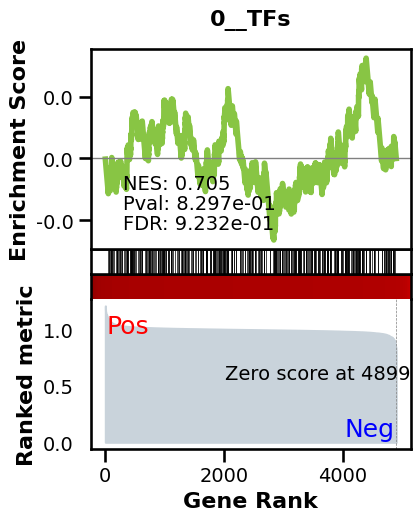

_________________________________________
TF specific enrichment


found some significant results for  6.666666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3301 genes
intersection pct: 0.6736734693877551
precision:  0.0022677009343624412 
recall:  0.2771996215704825 
random precision: 0.0007762569652905915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.53it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.98it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.20it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.33it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.38it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.49it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.46it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.51it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.51it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.57it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.53it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.54it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.54it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.53it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.49it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.48it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.47it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.49it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.51it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.51it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.54it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.45it/s]

Average Precision (AP):  0.0013873921355728306
Area Under Precision-Recall Curve (AUPRC):  0.0011671702410178584
EPR: 3.5176226236734447


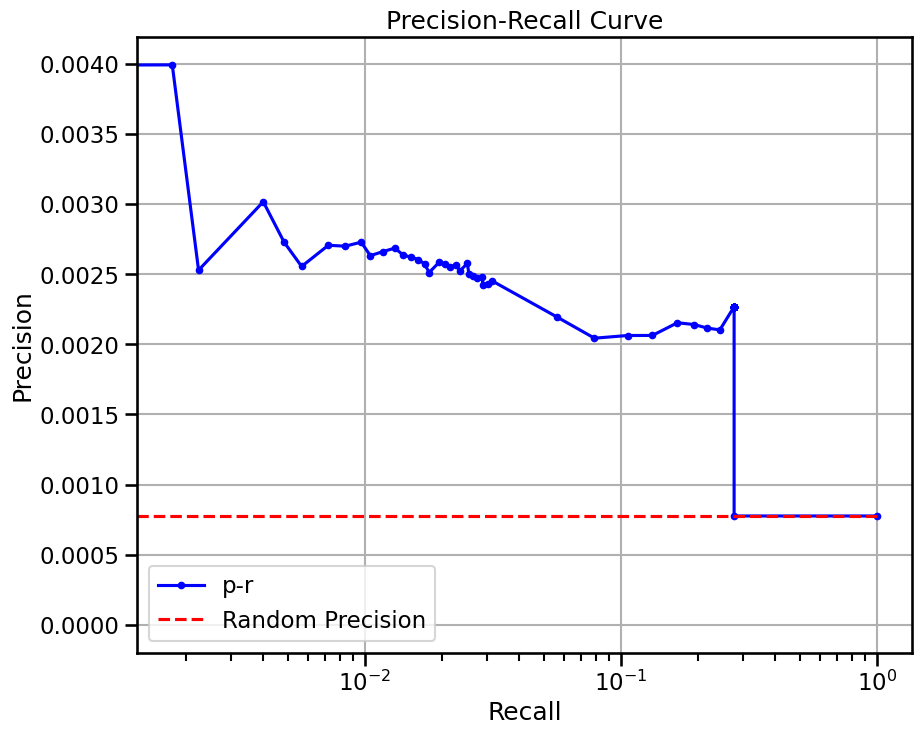

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 322.57 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


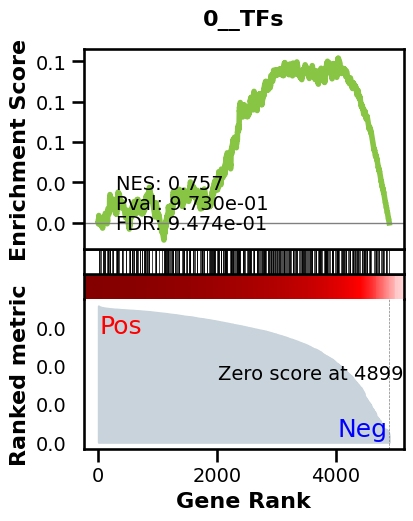

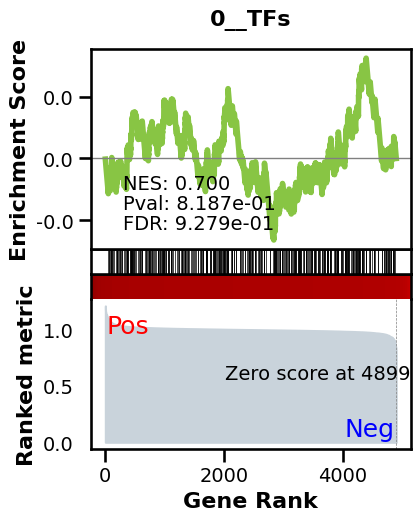

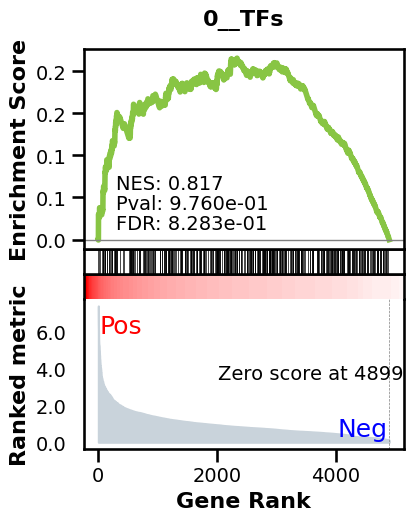

_________________________________________
TF specific enrichment


found some significant results for  3.3333333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3301 genes
intersection pct: 0.6736734693877551
precision:  0.0008202787109800952 
recall:  0.6333964049195837 
random precision: 0.0007762569652905915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.69it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.65it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.61it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.69it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.65it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.59it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.59it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.54it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.56it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.57it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.63it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.61it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.69it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.72it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.76it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.64it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.38it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.43it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 54.55it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 54.51it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 54.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.54it/s]

Average Precision (AP):  0.0008550318618334701
Area Under Precision-Recall Curve (AUPRC):  0.0008484402172894622
EPR: 1.2191781988923325


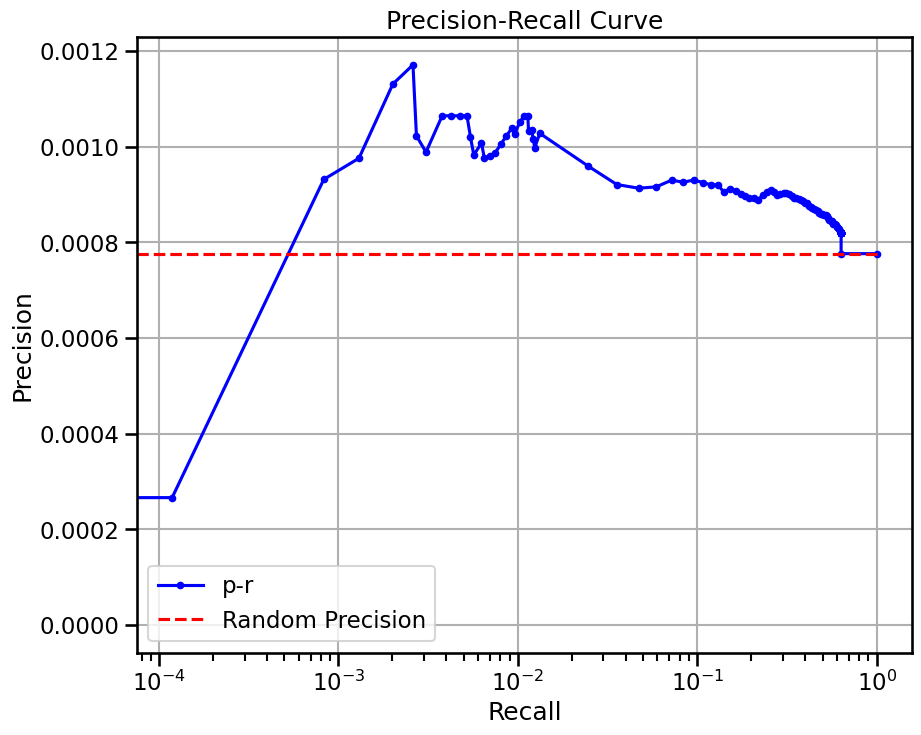

rod bipolar cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100




running jobs on 20 threads


Elapsed time: 113.08 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


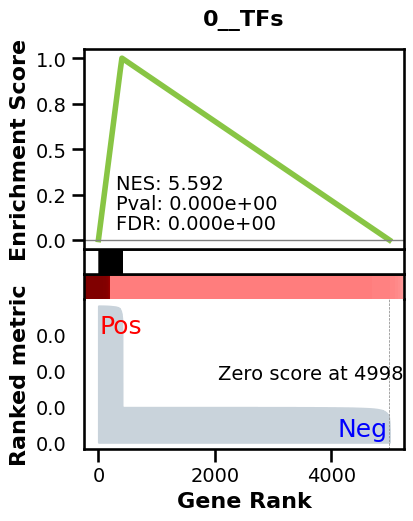

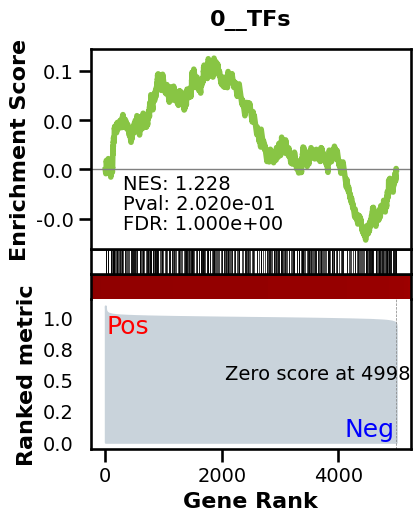

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3520 genes
intersection pct: 0.7041408281656332
precision:  0.00169022898883782 
recall:  0.23730644580482535 
random precision: 0.0006725664574130047


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.28it/s]

  8%|▊         | 10/128 [00:00<00:02, 49.12it/s]

 12%|█▏        | 15/128 [00:00<00:02, 48.75it/s]

 16%|█▌        | 20/128 [00:00<00:02, 48.88it/s]

 20%|█▉        | 25/128 [00:00<00:02, 48.96it/s]

 23%|██▎       | 30/128 [00:00<00:02, 48.98it/s]

 27%|██▋       | 35/128 [00:00<00:01, 49.00it/s]

 31%|███▏      | 40/128 [00:00<00:01, 49.01it/s]

 35%|███▌      | 45/128 [00:00<00:01, 49.04it/s]

 39%|███▉      | 50/128 [00:01<00:01, 49.07it/s]

 43%|████▎     | 55/128 [00:01<00:01, 49.05it/s]

 47%|████▋     | 60/128 [00:01<00:01, 49.04it/s]

 51%|█████     | 65/128 [00:01<00:01, 49.06it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 49.06it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 49.08it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 49.07it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 49.08it/s]

 70%|███████   | 90/128 [00:01<00:00, 49.07it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 49.04it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 49.01it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 49.05it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 49.02it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 49.01it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 49.06it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 49.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.03it/s]

Average Precision (AP):  0.0011071256946813116
Area Under Precision-Recall Curve (AUPRC):  0.0009965540663223165
EPR: 3.94187899529546


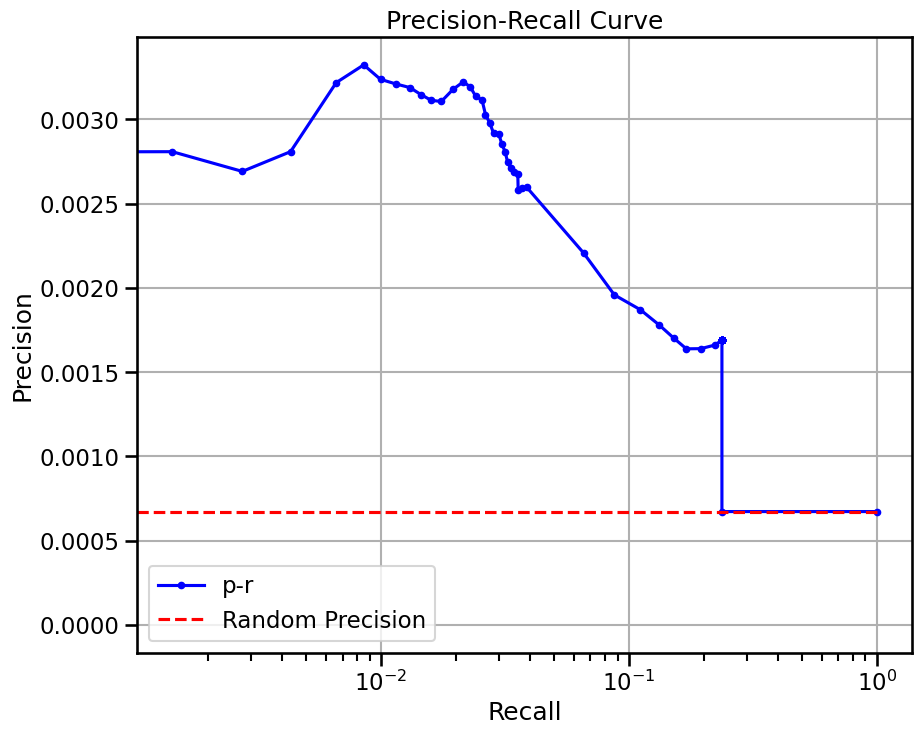

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 446.47 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


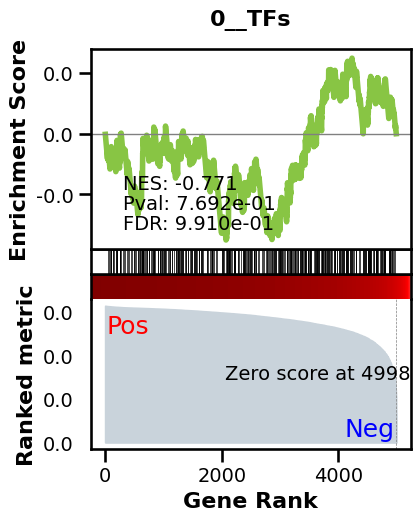

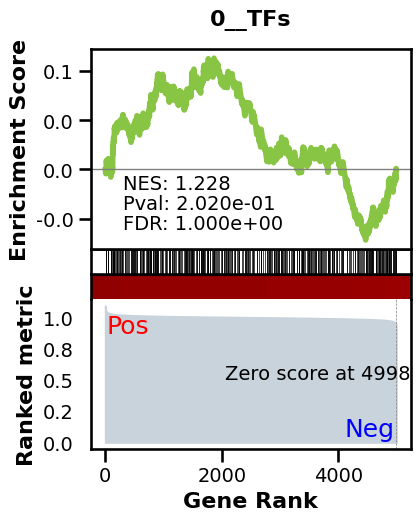

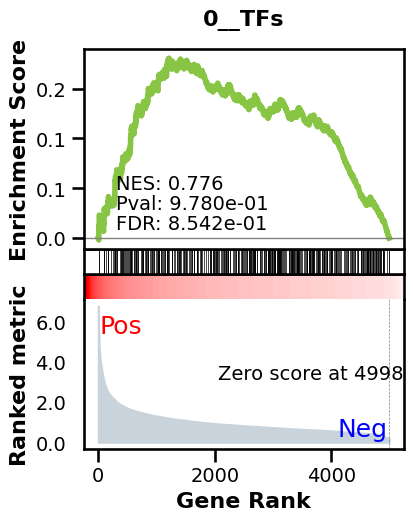

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3520 genes
intersection pct: 0.7041408281656332
precision:  0.0007251513473583216 
recall:  0.8281118713239707 
random precision: 0.0006725664574130047


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.58it/s]

  8%|▊         | 10/128 [00:00<00:02, 49.47it/s]

 12%|█▏        | 15/128 [00:00<00:02, 49.42it/s]

 16%|█▌        | 20/128 [00:00<00:02, 49.48it/s]

 20%|█▉        | 25/128 [00:00<00:02, 49.47it/s]

 23%|██▎       | 30/128 [00:00<00:01, 49.46it/s]

 27%|██▋       | 35/128 [00:00<00:01, 49.44it/s]

 31%|███▏      | 40/128 [00:00<00:01, 49.40it/s]

 35%|███▌      | 45/128 [00:00<00:01, 49.33it/s]

 39%|███▉      | 50/128 [00:01<00:01, 49.36it/s]

 43%|████▎     | 55/128 [00:01<00:01, 49.32it/s]

 47%|████▋     | 60/128 [00:01<00:01, 49.35it/s]

 51%|█████     | 65/128 [00:01<00:01, 49.33it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 49.31it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 49.36it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 49.38it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 49.37it/s]

 70%|███████   | 90/128 [00:01<00:00, 49.37it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 49.35it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 49.33it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 49.33it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 49.34it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 49.32it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 49.31it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 49.32it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.35it/s]

Average Precision (AP):  0.0007712255155223485
Area Under Precision-Recall Curve (AUPRC):  0.0007637460764859492
EPR: 2.5036434354704222


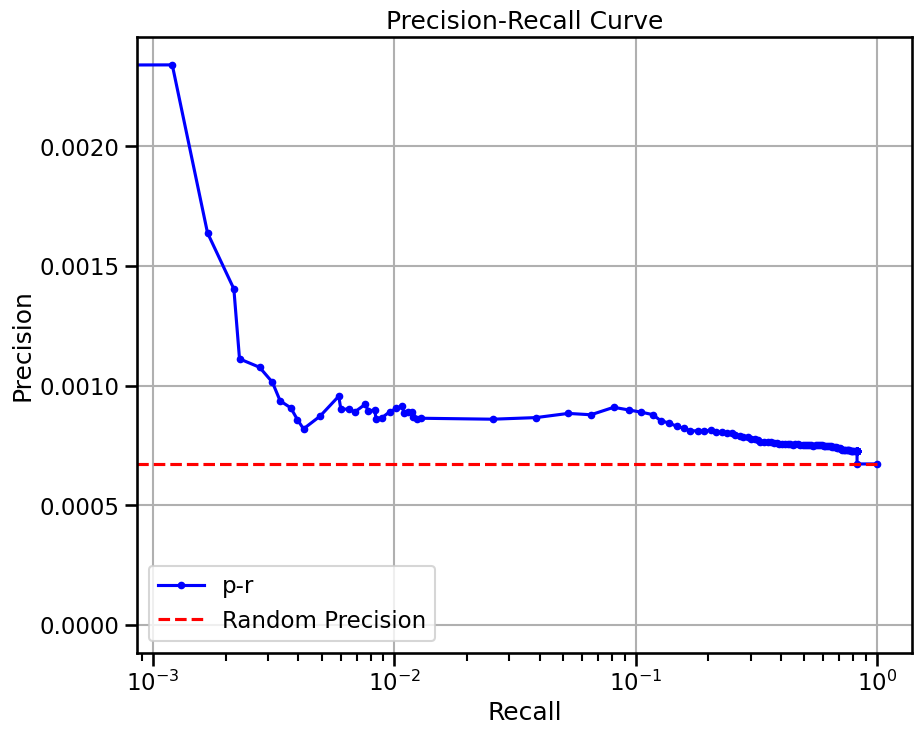

retinal cone cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 124.16 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


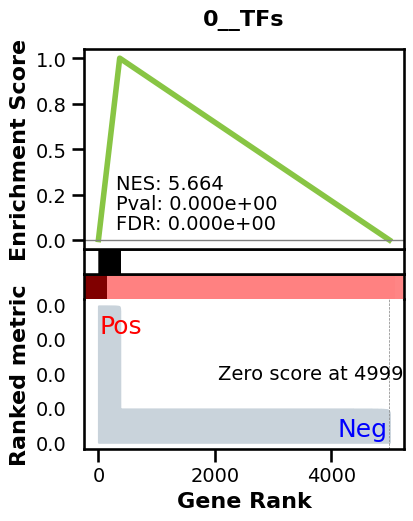

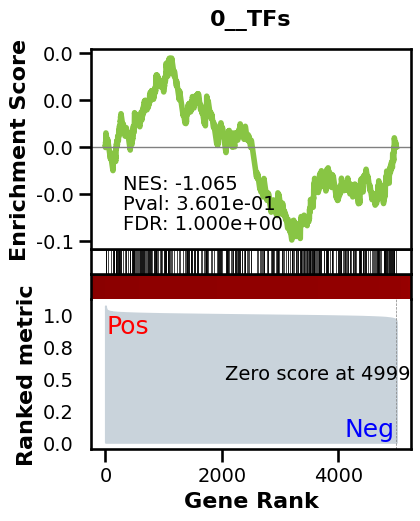

_________________________________________
TF specific enrichment


found some significant results for  12.121212121212121 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3522 genes
intersection pct: 0.7044
precision:  0.002837998083356004 
recall:  0.31426472131835836 
random precision: 0.0007682468505265962


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.62it/s]

  8%|▊         | 10/128 [00:00<00:02, 49.67it/s]

 12%|█▏        | 15/128 [00:00<00:02, 49.71it/s]

 16%|█▌        | 20/128 [00:00<00:02, 49.70it/s]

 20%|█▉        | 25/128 [00:00<00:02, 49.01it/s]

 23%|██▎       | 30/128 [00:00<00:02, 48.85it/s]

 27%|██▋       | 35/128 [00:00<00:01, 48.71it/s]

 31%|███▏      | 40/128 [00:00<00:01, 48.56it/s]

 35%|███▌      | 45/128 [00:00<00:01, 48.52it/s]

 39%|███▉      | 50/128 [00:01<00:01, 48.53it/s]

 43%|████▎     | 55/128 [00:01<00:01, 48.55it/s]

 47%|████▋     | 60/128 [00:01<00:01, 48.48it/s]

 51%|█████     | 65/128 [00:01<00:01, 48.49it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 48.46it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 48.51it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 48.45it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 48.41it/s]

 70%|███████   | 90/128 [00:01<00:00, 48.44it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 48.47it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 48.46it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 48.47it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 48.46it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 48.50it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 48.53it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 48.26it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 48.58it/s]

Average Precision (AP):  0.001921946471890548
Area Under Precision-Recall Curve (AUPRC):  0.0016722752377943246
EPR: 8.56919844540832


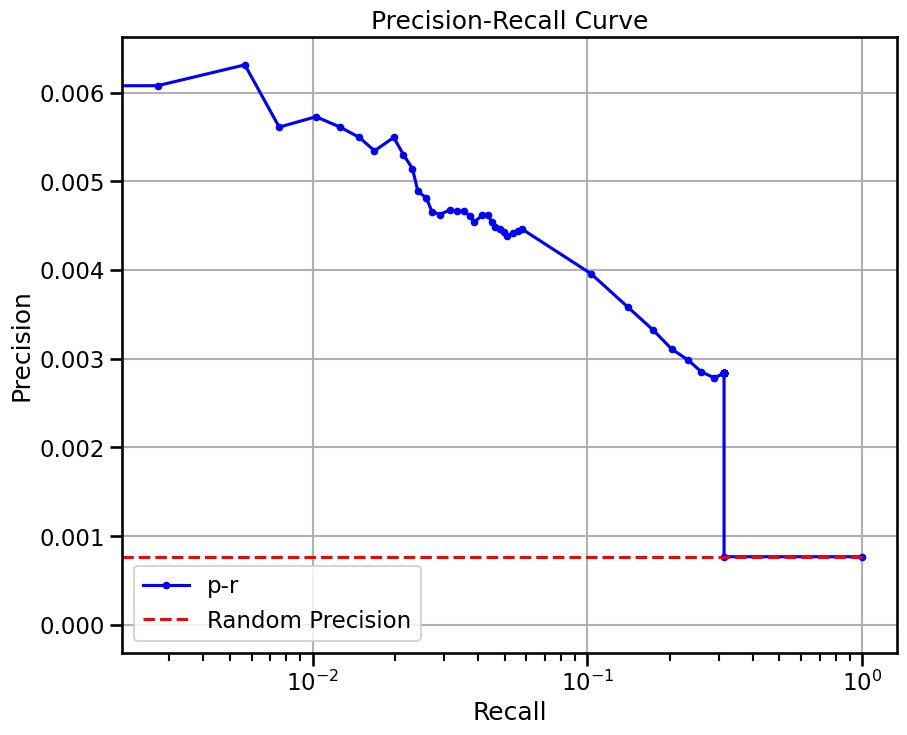

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 496.49 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


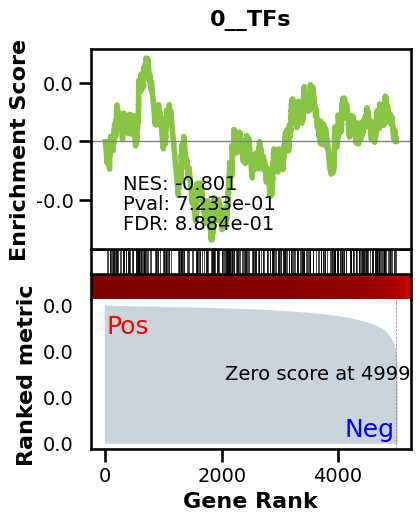

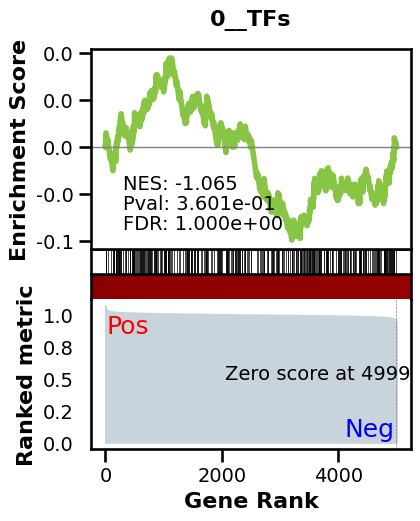

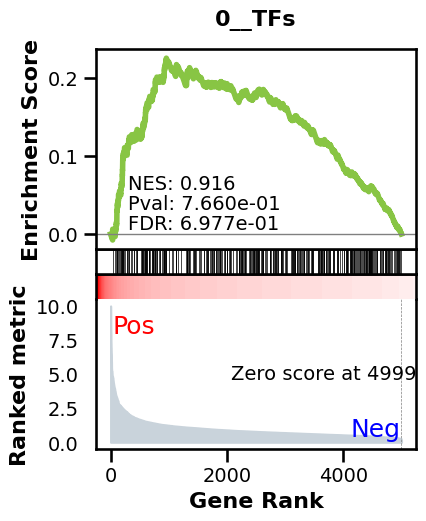

_________________________________________
TF specific enrichment


found some significant results for  3.0303030303030303 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3522 genes
intersection pct: 0.7044
precision:  0.0007969476894045459 
recall:  0.8851684685630313 
random precision: 0.0007682468505265962


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.01it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.11it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.93it/s]

 16%|█▌        | 20/128 [00:00<00:02, 48.28it/s]

 20%|█▉        | 25/128 [00:00<00:02, 48.51it/s]

 23%|██▎       | 30/128 [00:00<00:02, 48.66it/s]

 27%|██▋       | 35/128 [00:00<00:01, 48.73it/s]

 31%|███▏      | 40/128 [00:00<00:01, 48.76it/s]

 35%|███▌      | 45/128 [00:00<00:01, 48.79it/s]

 39%|███▉      | 50/128 [00:01<00:01, 48.82it/s]

 43%|████▎     | 55/128 [00:01<00:01, 48.85it/s]

 47%|████▋     | 60/128 [00:01<00:01, 48.89it/s]

 51%|█████     | 65/128 [00:01<00:01, 48.89it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 48.87it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 48.87it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 48.85it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 48.84it/s]

 70%|███████   | 90/128 [00:01<00:00, 48.81it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 48.79it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 48.81it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 48.83it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 48.84it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 48.84it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 48.86it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 48.88it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 48.73it/s]

Average Precision (AP):  0.0008649538241604022
Area Under Precision-Recall Curve (AUPRC):  0.0008626086364452706


EPR: 1.3670606573644466


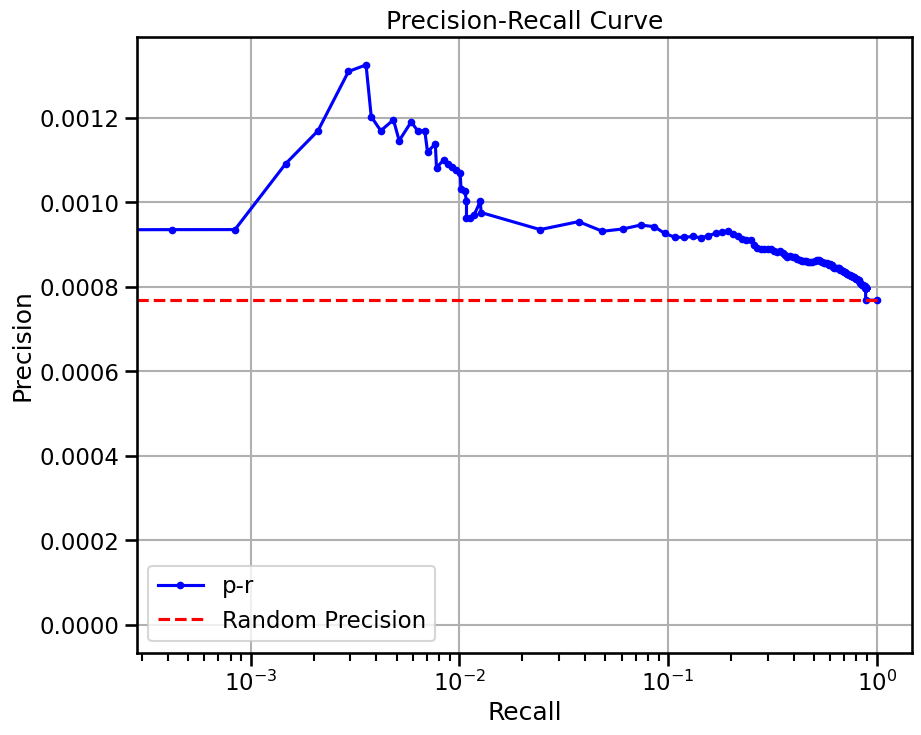

retina horizontal cell (1024, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 126.63 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


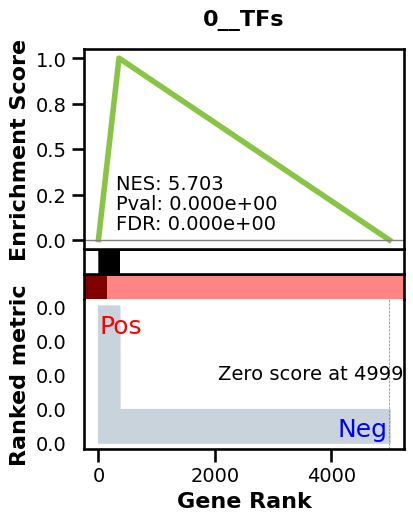

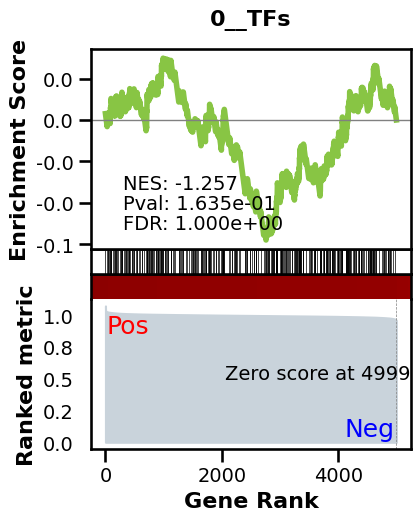

_________________________________________
TF specific enrichment


found some significant results for  3.8461538461538463 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3550 genes
intersection pct: 0.71
precision:  0.0037748748175384784 
recall:  0.31647432421965765 
random precision: 0.0010247679370106238


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 47.17it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.24it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.19it/s]

 16%|█▌        | 20/128 [00:00<00:02, 47.19it/s]

 20%|█▉        | 25/128 [00:00<00:02, 47.18it/s]

 23%|██▎       | 30/128 [00:00<00:02, 47.18it/s]

 27%|██▋       | 35/128 [00:00<00:01, 47.16it/s]

 31%|███▏      | 40/128 [00:00<00:01, 47.16it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.16it/s]

 39%|███▉      | 50/128 [00:01<00:01, 47.17it/s]

 43%|████▎     | 55/128 [00:01<00:01, 47.17it/s]

 47%|████▋     | 60/128 [00:01<00:01, 47.19it/s]

 51%|█████     | 65/128 [00:01<00:01, 47.20it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 47.16it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 47.17it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 47.19it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 47.17it/s]

 70%|███████   | 90/128 [00:01<00:00, 47.17it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 47.15it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 47.16it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 47.16it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 47.17it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 47.17it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 46.91it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 46.96it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.12it/s]

Average Precision (AP):  0.0025274622448941773
Area Under Precision-Recall Curve (AUPRC):  0.0021644180203140954
EPR: 7.427608120352016


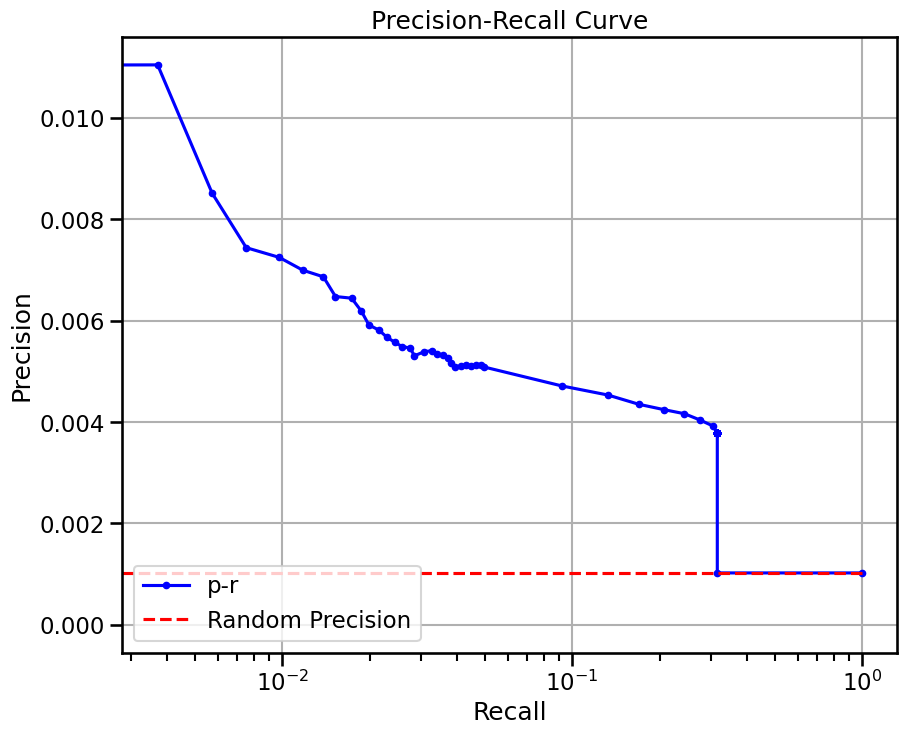

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 504.97 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


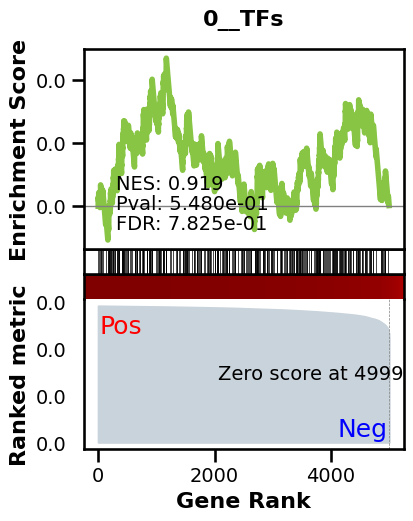

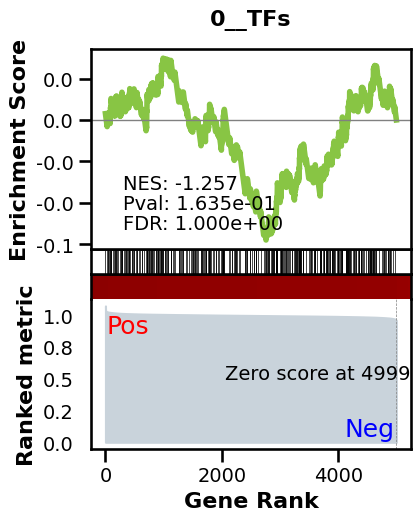

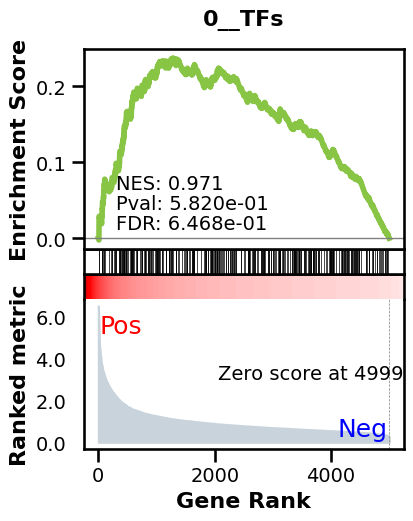

_________________________________________
TF specific enrichment


found some significant results for  15.384615384615385 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3550 genes
intersection pct: 0.71
precision:  0.0010578720043285064 
recall:  0.9222368522964913 
random precision: 0.0010247679370106238


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 47.76it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.79it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.78it/s]

 16%|█▌        | 20/128 [00:00<00:02, 47.77it/s]

 20%|█▉        | 25/128 [00:00<00:02, 47.75it/s]

 23%|██▎       | 30/128 [00:00<00:02, 47.69it/s]

 27%|██▋       | 35/128 [00:00<00:01, 47.68it/s]

 31%|███▏      | 40/128 [00:00<00:01, 47.68it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.66it/s]

 39%|███▉      | 50/128 [00:01<00:01, 47.66it/s]

 43%|████▎     | 55/128 [00:01<00:01, 47.64it/s]

 47%|████▋     | 60/128 [00:01<00:01, 47.63it/s]

 51%|█████     | 65/128 [00:01<00:01, 47.68it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 47.69it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 47.70it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 47.71it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 47.68it/s]

 70%|███████   | 90/128 [00:01<00:00, 47.64it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 47.64it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 47.71it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 47.71it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 47.71it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 47.71it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 47.71it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 47.75it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.69it/s]

Average Precision (AP):  0.0011481611159072796
Area Under Precision-Recall Curve (AUPRC):  0.0011451388932890746
EPR: 2.273350855776954


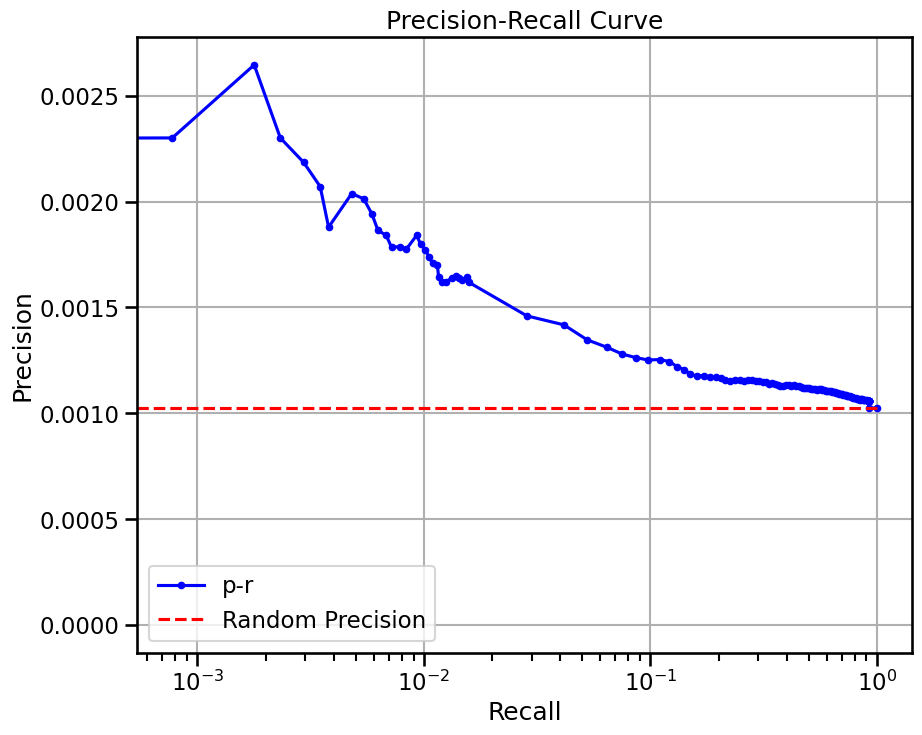

retinal ganglion cell (493, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 83.84 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


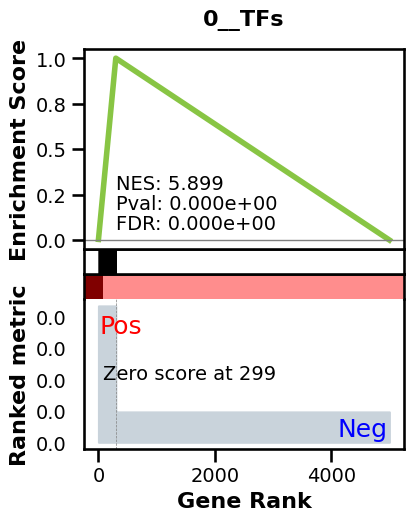

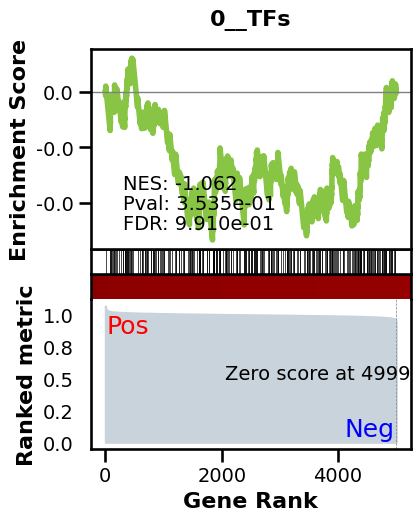

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3676 genes
intersection pct: 0.7352
precision:  0.0031297770073280278 
recall:  0.23127086406334912 
random precision: 0.0009534912985868993


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 43.08it/s]

  8%|▊         | 10/128 [00:00<00:02, 43.03it/s]

 12%|█▏        | 15/128 [00:00<00:02, 42.97it/s]

 16%|█▌        | 20/128 [00:00<00:02, 42.61it/s]

 20%|█▉        | 25/128 [00:00<00:02, 42.51it/s]

 23%|██▎       | 30/128 [00:00<00:02, 42.51it/s]

 27%|██▋       | 35/128 [00:00<00:02, 42.47it/s]

 31%|███▏      | 40/128 [00:00<00:02, 42.42it/s]

 35%|███▌      | 45/128 [00:01<00:01, 42.42it/s]

 39%|███▉      | 50/128 [00:01<00:01, 42.37it/s]

 43%|████▎     | 55/128 [00:01<00:01, 42.38it/s]

 47%|████▋     | 60/128 [00:01<00:01, 41.92it/s]

 51%|█████     | 65/128 [00:01<00:01, 42.04it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 42.16it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 42.23it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 42.27it/s]

 66%|██████▋   | 85/128 [00:02<00:01, 42.32it/s]

 70%|███████   | 90/128 [00:02<00:00, 42.35it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 42.35it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 42.37it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 42.37it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 42.35it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 42.36it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 42.36it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 42.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 42.36it/s]

Average Precision (AP):  0.0018676120788809435
Area Under Precision-Recall Curve (AUPRC):  0.0016592187236417512
EPR: 5.6678887414712


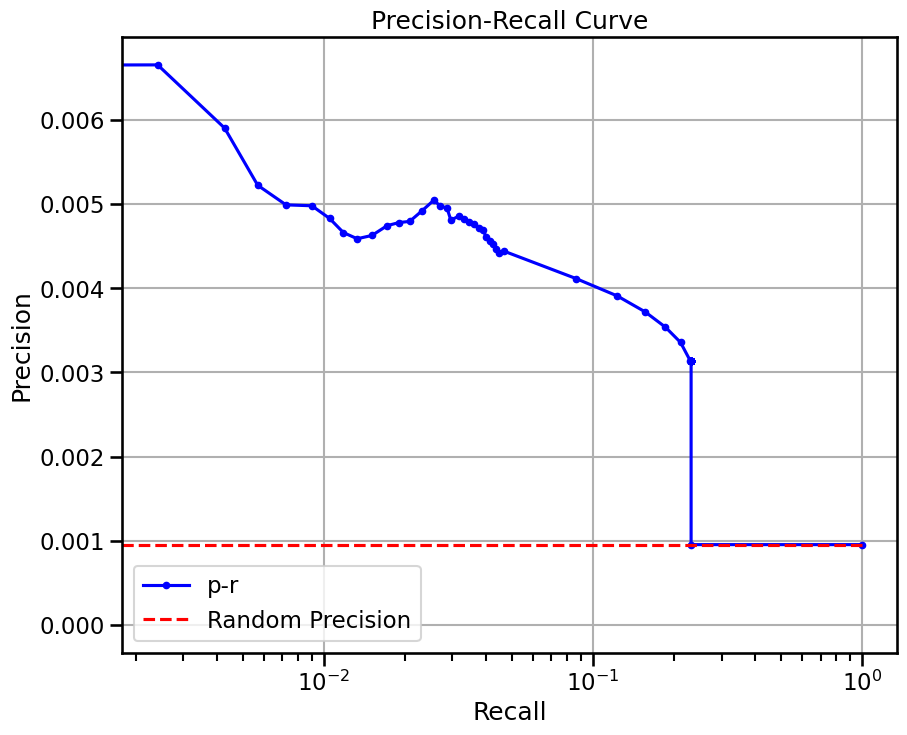

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 275.38 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


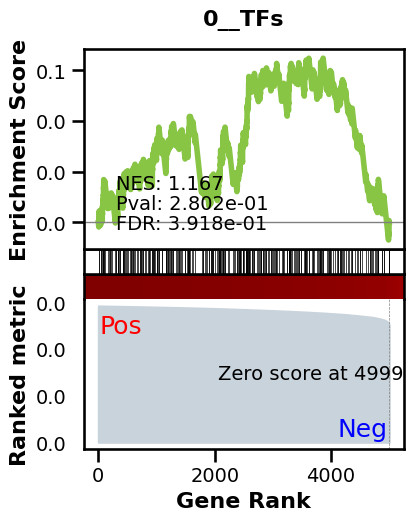

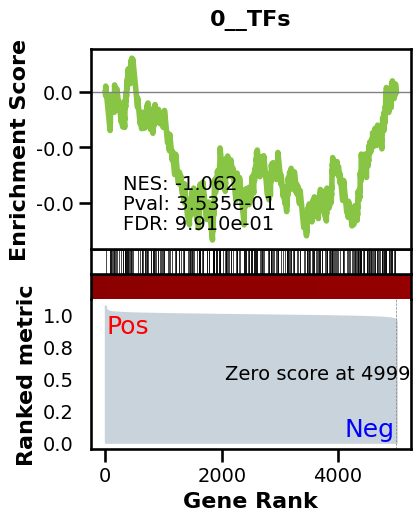

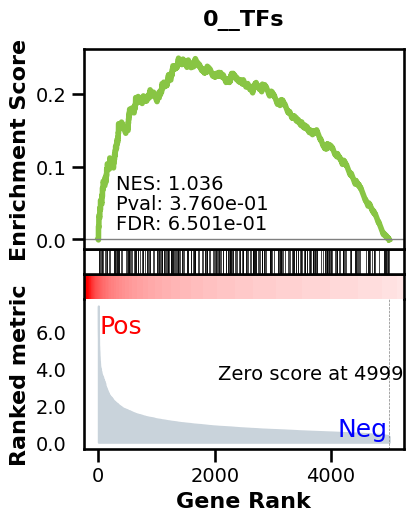

_________________________________________
TF specific enrichment


found some significant results for  4.166666666666667 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3676 genes
intersection pct: 0.7352
precision:  0.0009839316050430419 
recall:  0.8903811815852807 
random precision: 0.0009534912985868993


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 44.03it/s]

  8%|▊         | 10/128 [00:00<00:02, 43.92it/s]

 12%|█▏        | 15/128 [00:00<00:02, 43.92it/s]

 16%|█▌        | 20/128 [00:00<00:02, 43.85it/s]

 20%|█▉        | 25/128 [00:00<00:02, 43.83it/s]

 23%|██▎       | 30/128 [00:00<00:02, 43.86it/s]

 27%|██▋       | 35/128 [00:00<00:02, 43.85it/s]

 31%|███▏      | 40/128 [00:00<00:02, 43.84it/s]

 35%|███▌      | 45/128 [00:01<00:01, 43.85it/s]

 39%|███▉      | 50/128 [00:01<00:01, 43.82it/s]

 43%|████▎     | 55/128 [00:01<00:01, 43.85it/s]

 47%|████▋     | 60/128 [00:01<00:01, 43.79it/s]

 51%|█████     | 65/128 [00:01<00:01, 43.78it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 43.78it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 43.78it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 43.76it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 43.77it/s]

 70%|███████   | 90/128 [00:02<00:00, 43.78it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 43.76it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 43.74it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 43.76it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 43.80it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 43.75it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 43.76it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 43.77it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.79it/s]

Average Precision (AP):  0.0010371599609288397
Area Under Precision-Recall Curve (AUPRC):  0.001034320051282565
EPR: 2.203392699215658


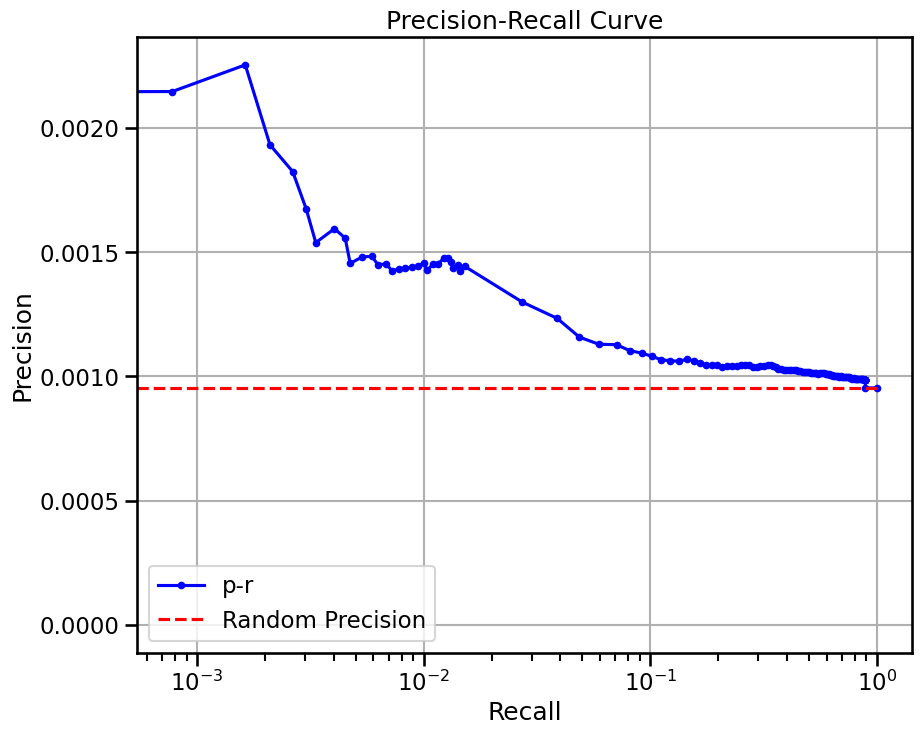

astrocyte (232, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 44.82 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


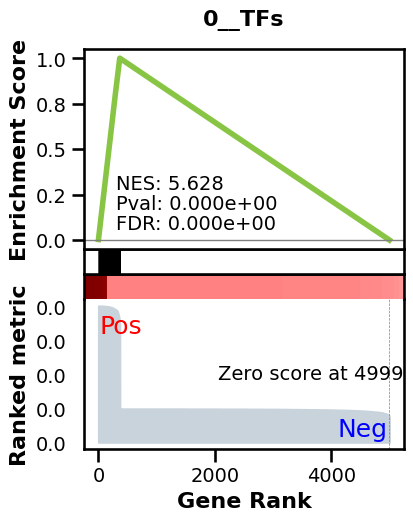

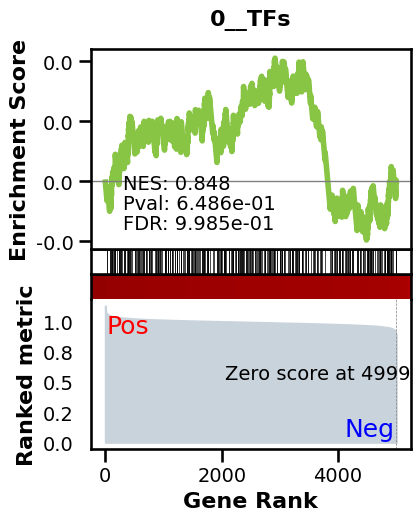

_________________________________________
TF specific enrichment


found some significant results for  10.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3645 genes
intersection pct: 0.729
precision:  0.006711770085251529 
recall:  0.40709779179810723 
random precision: 0.0014319722820759532


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 43.68it/s]

  8%|▊         | 10/128 [00:00<00:02, 43.70it/s]

 12%|█▏        | 15/128 [00:00<00:02, 43.65it/s]

 16%|█▌        | 20/128 [00:00<00:02, 43.64it/s]

 20%|█▉        | 25/128 [00:00<00:02, 43.60it/s]

 23%|██▎       | 30/128 [00:00<00:02, 43.63it/s]

 27%|██▋       | 35/128 [00:00<00:02, 43.60it/s]

 31%|███▏      | 40/128 [00:00<00:02, 43.62it/s]

 35%|███▌      | 45/128 [00:01<00:01, 43.59it/s]

 39%|███▉      | 50/128 [00:01<00:01, 43.62it/s]

 43%|████▎     | 55/128 [00:01<00:01, 43.62it/s]

 47%|████▋     | 60/128 [00:01<00:01, 43.60it/s]

 51%|█████     | 65/128 [00:01<00:01, 43.64it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 43.63it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 43.59it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 43.60it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 43.56it/s]

 70%|███████   | 90/128 [00:02<00:00, 43.56it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 43.36it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 43.40it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 43.41it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 43.49it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 43.49it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 43.52it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 43.55it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.55it/s]

Average Precision (AP):  0.004597680881995737
Area Under Precision-Recall Curve (AUPRC):  0.004024903433888049
EPR: 7.746247041450851


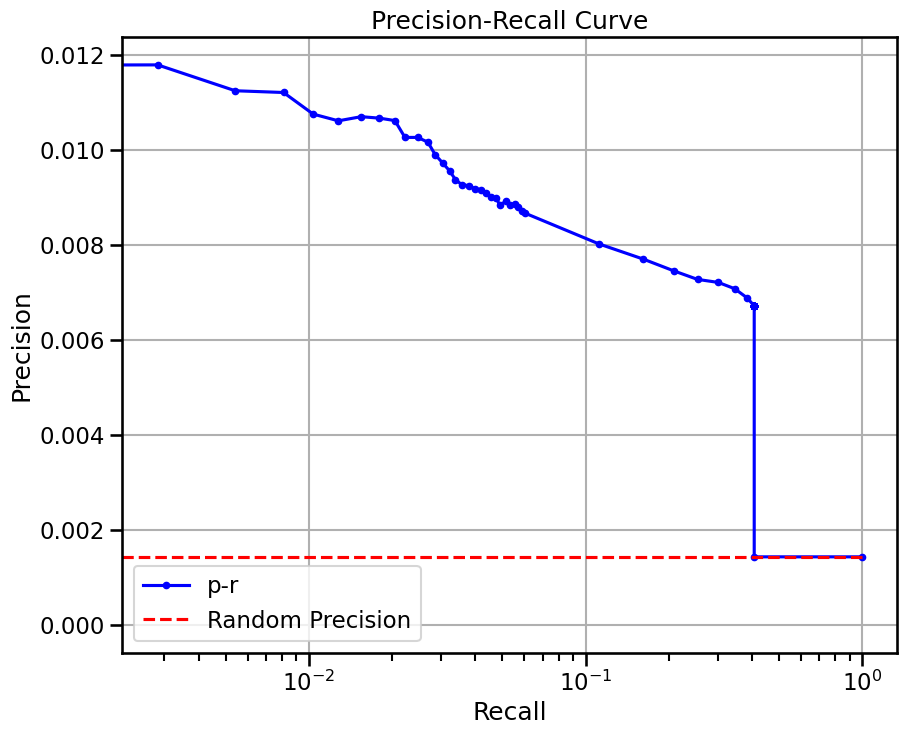

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 89.30 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


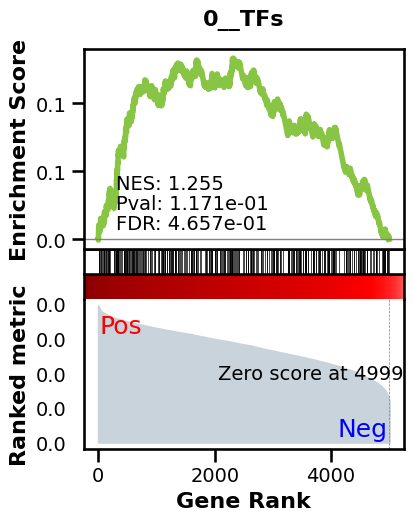

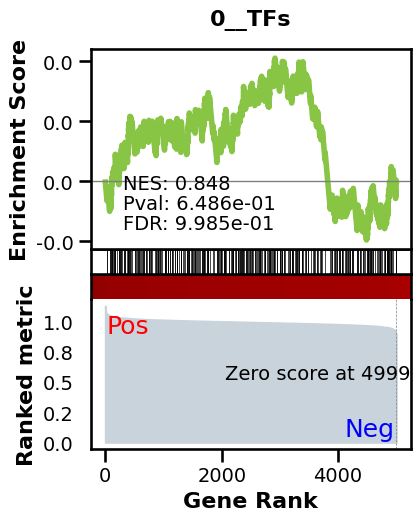

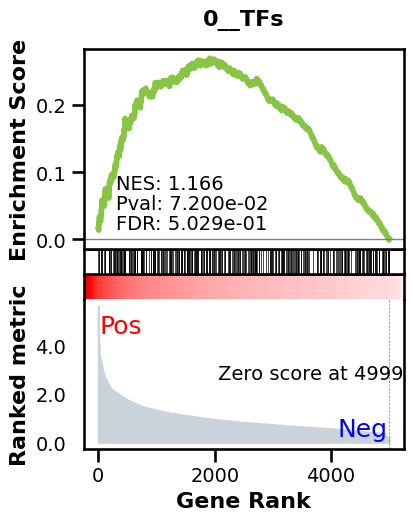

_________________________________________
TF specific enrichment


found some significant results for  16.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3645 genes
intersection pct: 0.729
precision:  0.0016825096990557926 
recall:  0.5523133543638276 
random precision: 0.0014319722820759532


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 43.31it/s]

  8%|▊         | 10/128 [00:00<00:02, 43.22it/s]

 12%|█▏        | 15/128 [00:00<00:02, 43.21it/s]

 16%|█▌        | 20/128 [00:00<00:02, 43.15it/s]

 20%|█▉        | 25/128 [00:00<00:02, 43.16it/s]

 23%|██▎       | 30/128 [00:00<00:02, 43.13it/s]

 27%|██▋       | 35/128 [00:00<00:02, 42.94it/s]

 31%|███▏      | 40/128 [00:00<00:02, 42.96it/s]

 35%|███▌      | 45/128 [00:01<00:01, 42.98it/s]

 39%|███▉      | 50/128 [00:01<00:01, 43.03it/s]

 43%|████▎     | 55/128 [00:01<00:01, 42.67it/s]

 47%|████▋     | 60/128 [00:01<00:01, 42.58it/s]

 51%|█████     | 65/128 [00:01<00:01, 42.51it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 42.49it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 42.44it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 42.46it/s]

 66%|██████▋   | 85/128 [00:01<00:01, 42.47it/s]

 70%|███████   | 90/128 [00:02<00:00, 42.47it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 42.45it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 42.51it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 42.48it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 42.48it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 42.46it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 42.49it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 42.50it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 42.66it/s]

Average Precision (AP):  0.0016652894363956682
Area Under Precision-Recall Curve (AUPRC):  0.0016174279281124507


EPR: 1.9882654196325211


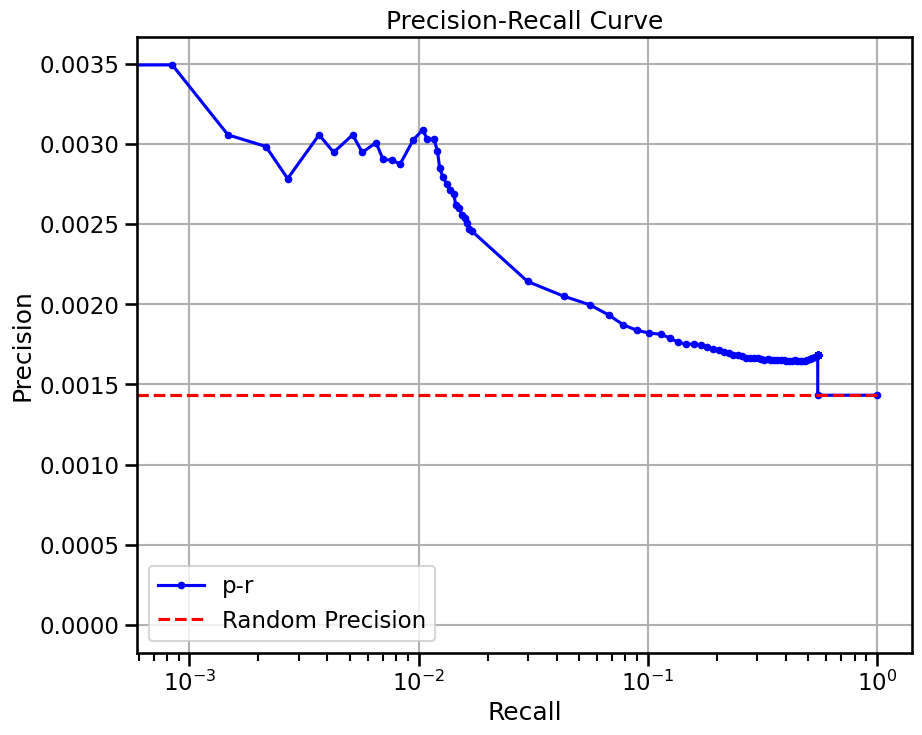

microglial cell (231, 5000)
Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 45.62 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


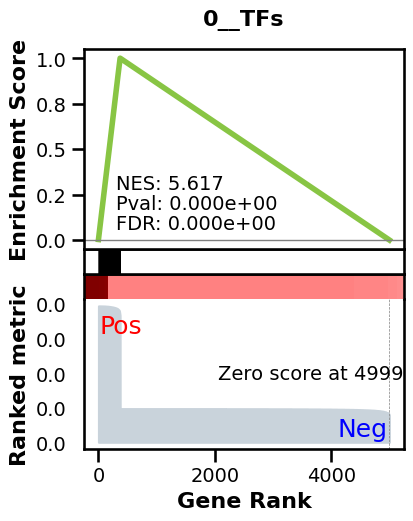

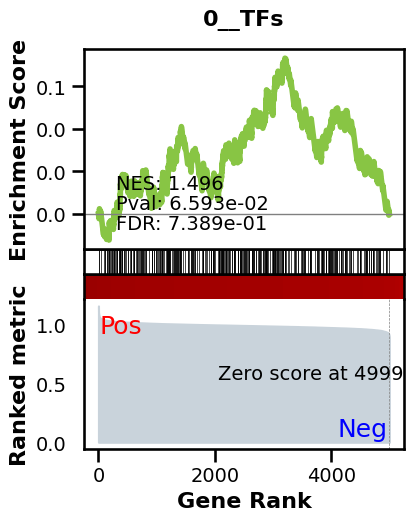

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3764 genes
intersection pct: 0.7528
precision:  0.009171534659319348 
recall:  0.44815100154083204 
random precision: 0.0018328243880301035


  0%|          | 0/128 [00:00<?, ?it/s]

  3%|▎         | 4/128 [00:00<00:03, 38.44it/s]

  6%|▋         | 8/128 [00:00<00:03, 38.31it/s]

  9%|▉         | 12/128 [00:00<00:03, 38.30it/s]

 12%|█▎        | 16/128 [00:00<00:02, 37.70it/s]

 16%|█▌        | 20/128 [00:00<00:02, 37.83it/s]

 19%|█▉        | 24/128 [00:00<00:02, 37.92it/s]

 22%|██▏       | 28/128 [00:00<00:02, 37.94it/s]

 25%|██▌       | 32/128 [00:00<00:02, 37.97it/s]

 28%|██▊       | 36/128 [00:00<00:02, 38.01it/s]

 31%|███▏      | 40/128 [00:01<00:02, 38.04it/s]

 34%|███▍      | 44/128 [00:01<00:02, 38.06it/s]

 38%|███▊      | 48/128 [00:01<00:02, 38.07it/s]

 41%|████      | 52/128 [00:01<00:01, 38.08it/s]

 44%|████▍     | 56/128 [00:01<00:01, 38.08it/s]

 47%|████▋     | 60/128 [00:01<00:01, 38.08it/s]

 50%|█████     | 64/128 [00:01<00:01, 38.10it/s]

 53%|█████▎    | 68/128 [00:01<00:01, 38.07it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 38.14it/s]

 59%|█████▉    | 76/128 [00:01<00:01, 38.14it/s]

 62%|██████▎   | 80/128 [00:02<00:01, 38.11it/s]

 66%|██████▌   | 84/128 [00:02<00:01, 38.11it/s]

 69%|██████▉   | 88/128 [00:02<00:01, 38.08it/s]

 72%|███████▏  | 92/128 [00:02<00:00, 38.10it/s]

 75%|███████▌  | 96/128 [00:02<00:00, 38.10it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 38.08it/s]

 81%|████████▏ | 104/128 [00:02<00:00, 38.08it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 38.07it/s]

 88%|████████▊ | 112/128 [00:02<00:00, 38.08it/s]

 91%|█████████ | 116/128 [00:03<00:00, 38.08it/s]

 94%|█████████▍| 120/128 [00:03<00:00, 38.09it/s]

 97%|█████████▋| 124/128 [00:03<00:00, 38.09it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:03<00:00, 38.04it/s]

100%|██████████| 128/128 [00:03<00:00, 38.06it/s]

Average Precision (AP):  0.005927481508078795
Area Under Precision-Recall Curve (AUPRC):  0.005255387377301545
EPR: 6.101289935139738


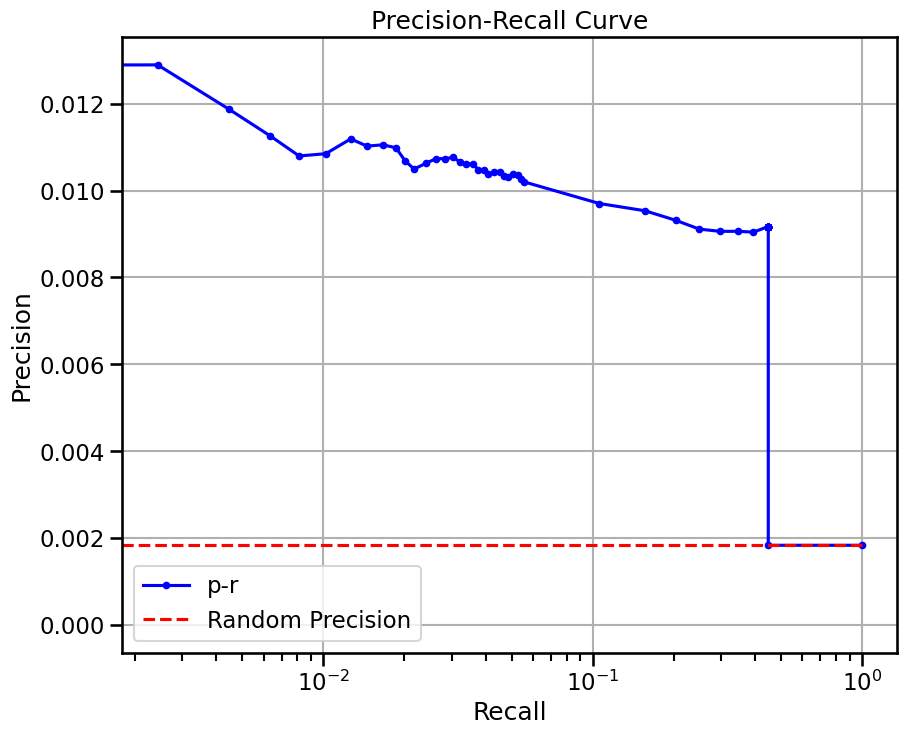

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 94.16 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


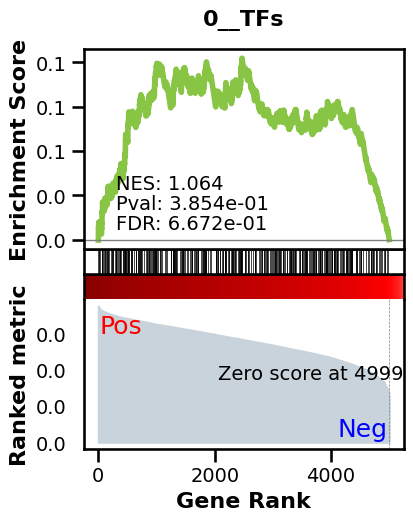

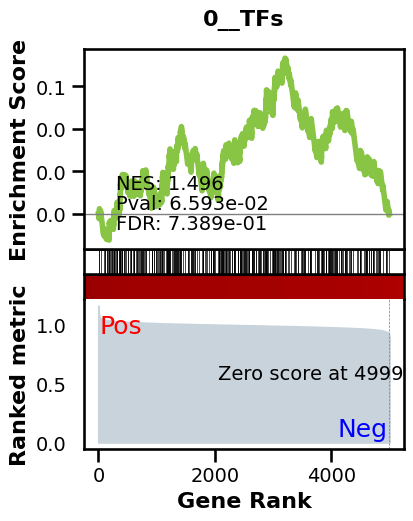

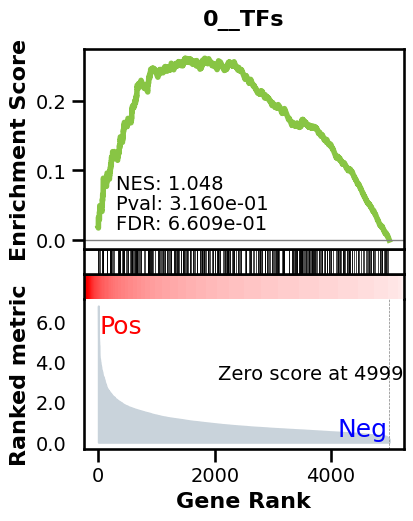

_________________________________________
TF specific enrichment


found some significant results for  3.0303030303030303 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3764 genes
intersection pct: 0.7528
precision:  0.0020202077932098216 
recall:  0.5446456086286595 
random precision: 0.0018328243880301035


  0%|          | 0/128 [00:00<?, ?it/s]

  3%|▎         | 4/128 [00:00<00:03, 39.00it/s]

  6%|▋         | 8/128 [00:00<00:03, 38.99it/s]

  9%|▉         | 12/128 [00:00<00:02, 39.08it/s]

 12%|█▎        | 16/128 [00:00<00:02, 39.12it/s]

 16%|█▌        | 20/128 [00:00<00:02, 39.14it/s]

 19%|█▉        | 24/128 [00:00<00:02, 39.20it/s]

 22%|██▏       | 28/128 [00:00<00:02, 39.16it/s]

 25%|██▌       | 32/128 [00:00<00:02, 39.09it/s]

 28%|██▊       | 36/128 [00:00<00:02, 39.08it/s]

 31%|███▏      | 40/128 [00:01<00:02, 39.08it/s]

 34%|███▍      | 44/128 [00:01<00:02, 39.07it/s]

 38%|███▊      | 48/128 [00:01<00:02, 39.06it/s]

 41%|████      | 52/128 [00:01<00:01, 39.01it/s]

 44%|████▍     | 56/128 [00:01<00:01, 39.05it/s]

 47%|████▋     | 60/128 [00:01<00:01, 39.06it/s]

 50%|█████     | 64/128 [00:01<00:01, 39.07it/s]

 53%|█████▎    | 68/128 [00:01<00:01, 39.08it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 39.08it/s]

 59%|█████▉    | 76/128 [00:01<00:01, 39.05it/s]

 62%|██████▎   | 80/128 [00:02<00:01, 39.03it/s]

 66%|██████▌   | 84/128 [00:02<00:01, 39.05it/s]

 69%|██████▉   | 88/128 [00:02<00:01, 39.01it/s]

 72%|███████▏  | 92/128 [00:02<00:00, 39.03it/s]

 75%|███████▌  | 96/128 [00:02<00:00, 39.02it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 39.02it/s]

 81%|████████▏ | 104/128 [00:02<00:00, 39.04it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 39.03it/s]

 88%|████████▊ | 112/128 [00:02<00:00, 39.01it/s]

 91%|█████████ | 116/128 [00:02<00:00, 39.00it/s]

 94%|█████████▍| 120/128 [00:03<00:00, 39.01it/s]

 97%|█████████▋| 124/128 [00:03<00:00, 38.99it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:03<00:00, 38.98it/s]

100%|██████████| 128/128 [00:03<00:00, 39.04it/s]

Average Precision (AP):  0.0020050670673717108
Area Under Precision-Recall Curve (AUPRC):  0.00196468815496622


EPR: 1.5160958167616783


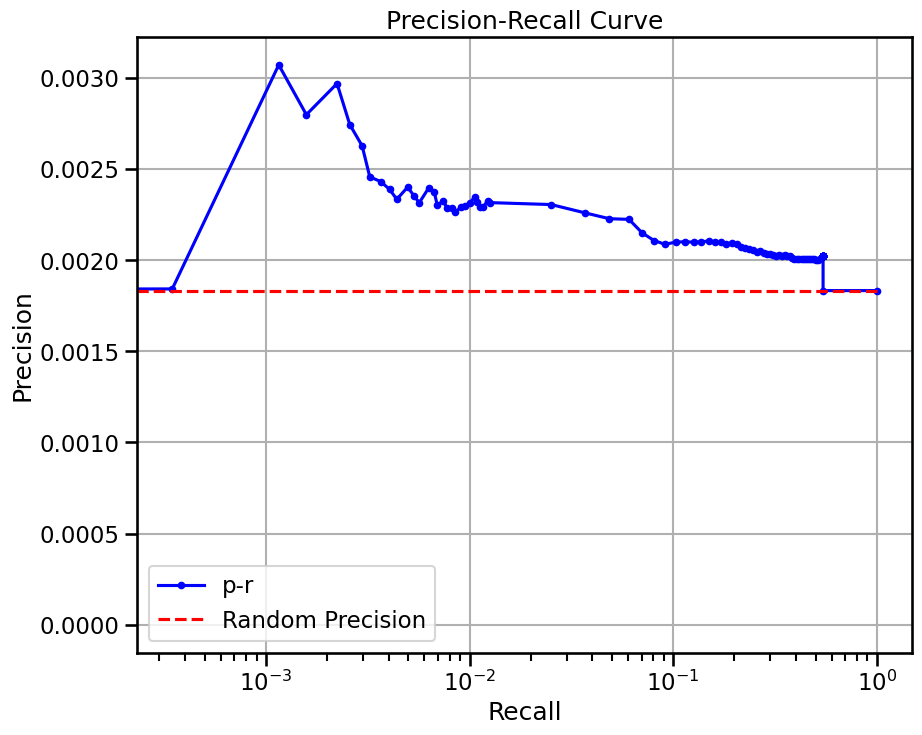

In [5]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(to_use)]
    print(celltype, subadata.shape)
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()

In [6]:
metrics

{'genie3_tf_retinal rod cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Gamma (PP) cells',
   'celltype.gmt__Cone photoreceptor cells',
   'celltype.gmt__Rod photoreceptor cells',
   'celltype.gmt__Satellite cells',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Enteroendocrine cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Enteric neurons'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.0052188435042794514,
  'recall': 0.4934210526315789,
  'rand_precision': 0.0007671537083301789,
  'auprc': 0.005094076938650243,
  'ap': 0.006033236518695923,
  'epr': 31.399097597750796},
 'genie3_retinal rod cell': {'enriched_terms_Central': ['celltype.gmt__Cone photoreceptor cells',
   'celltype.gmt__Rod photoreceptor cells'],
  'TF_enr': False,
  'enriched_terms_Regulators': ['celltype.gmt__Smooth muscle cells'],
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.0007591266310333455,
  'recall': 0.8026315789473685,
  'rand_precisio

In [7]:
False
True
False
True
True
True
True
True
False
True
False
True
True
True
False
True
False
True
False
False

False

In [8]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name        EPR     AUPRC      RAND    TF_targ  TF_enr  \
0         retinal rod cell  31.399098  0.005094  0.000767   0.000000    True   
1         retinal rod cell   8.676462  0.001275  0.000767   0.000000   False   
2             Mueller cell  10.287589  0.003957  0.001377   1.724138    True   
3             Mueller cell   2.528778  0.001541  0.001377  10.344828   False   
4            amacrine cell   7.423882  0.001571  0.000820   7.142857    True   
5            amacrine cell   2.878637  0.000901  0.000820   7.142857   False   
6          ON-bipolar cell   3.517623  0.001167  0.000776   6.666667    True   
7          ON-bipolar cell   1.219178  0.000848  0.000776   3.333333   False   
8         rod bipolar cell   3.941879  0.000997  0.000673   3.571429    True   
9         rod bipolar cell   2.503643  0.000764  0.000673   7.142857   False   
10       retinal cone cell   8.569198  0.001672  0.000768  12.121212    True   
11       retinal cone cell   1.367061  0.000863  0.000768   3.030303   False   
12  retina horizontal cell   7.427608  0.002164  0.001025   3.846154    True   
13  retina horizontal cell   2.273351  0.001145  0.001025  15.384615   False   
14   retinal ganglion cell   5.667889  0.001659  0.000953   0.000000    True   
15   retinal ganglion cell   2.203393  0.001034  0.000953   4.166667   False   
16               astrocyte   7.746247  0.004025  0.001432  10.000000    True   
17               astrocyte   1.988265  0.001617  0.001432  16.000000   False   
18         microglial cell   6.101290  0.005255  0.001833   9.090909    True   
19         microglial cell   1.516096  0.001965  0.001833   3.030303   False   

    TF_only  
0      True  
1     False  
2      True  
3     False  
4      True  
5     False  
6      True  
7     False  
8      True  
9     False  
10     True  
11    False  
12     True  
13    False  
14     True  
15    False  
16     True  
17    False  
18     True  
19    False